# 探索FBI枪支数据集

 **这个项目的数据来源于联邦调查局(FBI)的全国即时犯罪背景调查系统(NICS),枪支店用这个系统核查每个潜在买家是否符合购买资格。对于这个数据集主要想探讨的问题有：哪些人口普查数据变量与人均拥有枪支量高度相关？最受欢迎的枪支类型是什么, 这些枪支类型购买数量有什么变化, 哪些州购买这些最受欢迎枪数量总和最多？近两年哪些州的枪支注册增长率最高？枪支购买的整体趋势是怎样的？**

In [1]:
# 用这个框对你计划使用的所有数据包进行设置
#导入数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.mlab as mlab
from datetime import datetime
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateLocator
import seaborn as sns
% matplotlib inline
df1=pd.read_excel('gun_data.xlsx', sep=',', index_col='state')
df2=pd.read_csv('U.S. Census Data.csv', sep=',', index_col='Fact')

In [2]:
# 务必包含一个‘magic word’（带有“%”的***），以便将视图
# 与 notebook 保持一致。关于更多信息，请访问该网页：
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%magic

# <a id='wrangling'></a>
## 数据整理

> **提示**：在报告的这一部分中载入数据，检查简洁度，然后整理和清理数据集，以便进行分析。

In [3]:
# 加载数据一并打印几行。进行这几项操作，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
df1.head()

month   permit  permit_recheck  handgun  long_gun   other  \
state                                                                     
Alabama     2017-09  16717.0             0.0   5734.0    6320.0   221.0   
Alaska      2017-09    209.0             2.0   2320.0    2930.0   219.0   
Arizona     2017-09   5069.0           382.0  11063.0    7946.0   920.0   
Arkansas    2017-09   2935.0           632.0   4347.0    6063.0   165.0   
California  2017-09  57839.0             0.0  37165.0   24581.0  2984.0   

            multiple  admin  prepawn_handgun  prepawn_long_gun   ...    \
state                                                            ...     
Alabama          317    0.0             15.0              21.0   ...     
Alaska           160    0.0              5.0               2.0   ...     
Arizona          631    0.0             13.0               6.0   ...     
Arkansas         366   51.0             12.0              13.0   ...     
California         0    0.0              0.0               0.0   ...     

            returned_other  rentals_handgun  rentals_long_gun  \
state                                                           
Alabama                0.0              0.0               0.0   
Alaska                 0.0              0.0               0.0   
Arizona                0.0              0.0               0.0   
Arkansas               0.0              0.0               0.0   
California             0.0              0.0               0.0   

            private_sale_handgun  private_sale_long_gun  private_sale_other  \
state                                                                         
Alabama                      9.0                   16.0                 3.0   
Alaska                      17.0                   24.0                 1.0   
Arizona                     38.0                   12.0                 2.0   
Arkansas                    13.0                   23.0                 0.0   
California                   0.0                    0.0                 0.0   

            return_to_seller_handgun  return_to_seller_long_gun  \
state                                                             
Alabama                          0.0                        0.0   
Alaska                           0.0                        0.0   
Arizona                          0.0                        0.0   
Arkansas                         0.0                        2.0   
California                       0.0                        0.0   

            return_to_seller_other  totals  
state                                       
Alabama                        3.0   32019  
Alaska                         0.0    6303  
Arizona                        0.0   28394  
Arkansas                       1.0   17747  
California                     0.0  123506  

[5 rows x 26 columns]

In [4]:
# 加载最后几行
df1.tail()

month  permit  permit_recheck  handgun  long_gun  other  \
state                                                                      
Virginia       1998-11     0.0             NaN     14.0       2.0    NaN   
Washington     1998-11     1.0             NaN     65.0     286.0    NaN   
West Virginia  1998-11     3.0             NaN    149.0     251.0    NaN   
Wisconsin      1998-11     0.0             NaN     25.0     214.0    NaN   
Wyoming        1998-11     8.0             NaN     45.0      49.0    NaN   

               multiple  admin  prepawn_handgun  prepawn_long_gun   ...    \
state                                                               ...     
Virginia              8    0.0              NaN               NaN   ...     
Washington            8    1.0              NaN               NaN   ...     
West Virginia         5    0.0              NaN               NaN   ...     
Wisconsin             2    0.0              NaN               NaN   ...     
Wyoming               5    0.0              NaN               NaN   ...     

               returned_other  rentals_handgun  rentals_long_gun  \
state                                                              
Virginia                  NaN              NaN               NaN   
Washington                NaN              NaN               NaN   
West Virginia             NaN              NaN               NaN   
Wisconsin                 NaN              NaN               NaN   
Wyoming                   NaN              NaN               NaN   

               private_sale_handgun  private_sale_long_gun  \
state                                                        
Virginia                        NaN                    NaN   
Washington                      NaN                    NaN   
West Virginia                   NaN                    NaN   
Wisconsin                       NaN                    NaN   
Wyoming                         NaN                    NaN   

               private_sale_other  return_to_seller_handgun  \
state                                                         
Virginia                      NaN                       NaN   
Washington                    NaN                       NaN   
West Virginia                 NaN                       NaN   
Wisconsin                     NaN                       NaN   
Wyoming                       NaN                       NaN   

               return_to_seller_long_gun  return_to_seller_other  totals  
state                                                                     
Virginia                             NaN                     NaN      24  
Washington                           NaN                     NaN     361  
West Virginia                        NaN                     NaN     408  
Wisconsin                            NaN                     NaN     241  
Wyoming                              NaN                     NaN     107  

[5 rows x 26 columns]

In [5]:
#将索引恢复成数据列
df1.reset_index(inplace=True)

In [6]:
#查看索引、数据类型和内存信息
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
state                        12485 non-null object
month                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [7]:
#返回列的数据类型
df1.dtypes

state                         object
month                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [8]:
#将 multiple列数据类型由整型转化成浮点类型
df1['multiple']=df1['multiple'].apply(float)

In [9]:
#将 totals列数据类型由整型转换成浮点类型
df1['totals']=df1['totals'].apply(float)

In [10]:
#转换完数据类型后再次查看索引、数据类型和内存信息
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
state                        12485 non-null object
month                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null float64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other 

In [11]:
#用fillna填充缺失数据
df1.fillna(df1.mean(), inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
state                        12485 non-null object
month                        12485 non-null object
permit                       12485 non-null float64
permit_recheck               12485 non-null float64
handgun                      12485 non-null float64
long_gun                     12485 non-null float64
other                        12485 non-null float64
multiple                     12485 non-null float64
admin                        12485 non-null float64
prepawn_handgun              12485 non-null float64
prepawn_long_gun             12485 non-null float64
prepawn_other                12485 non-null float64
redemption_handgun           12485 non-null float64
redemption_long_gun          12485 non-null float64
redemption_other             12485 non-null float64
returned_handgun             12485 non-null float64
returned_long_gun            12485 non-null float64
returned_

In [12]:
#计算冗余数据的数量总和
sum(df1.duplicated())

0

In [13]:
#查看每个列的缺失值数量
df1.isnull().sum()

state                        0
month                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [14]:
#看哪一列还有空值 - 应显示为“假”
df1.isnull().any()

state                        False
month                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [15]:
#返回数据框维度的元组
df1.shape

(12485, 27)

In [16]:
#查看数据有多少个唯一值
df1.nunique()

state                           55
month                          227
permit                        5391
permit_recheck                 169
handgun                       7382
long_gun                      8351
other                         1227
multiple                      1387
admin                          500
prepawn_handgun                 91
prepawn_long_gun               134
prepawn_other                   17
redemption_handgun            1894
redemption_long_gun           2371
redemption_other                48
returned_handgun               238
returned_long_gun              114
returned_other                  35
rentals_handgun                 10
rentals_long_gun                 9
private_sale_handgun           153
private_sale_long_gun          137
private_sale_other              44
return_to_seller_handgun        18
return_to_seller_long_gun       18
return_to_seller_other           6
totals                       10218
dtype: int64

In [17]:
#以numpy.ndarry对象返回列的所有数值
df1.values

array([['Alabama', '2017-09', 16717.0, ..., 0.0, 3.0, 32019.0],
       ['Alaska', '2017-09', 209.0, ..., 0.0, 0.0, 6303.0],
       ['Arizona', '2017-09', 5069.0, ..., 0.0, 0.0, 28394.0],
       ...,
       ['West Virginia', '1998-11', 3.0, ..., 0.44181818181818183,
        0.10598669623059867, 408.0],
       ['Wisconsin', '1998-11', 0.0, ..., 0.44181818181818183,
        0.10598669623059867, 241.0],
       ['Wyoming', '1998-11', 8.0, ..., 0.44181818181818183,
        0.10598669623059867, 107.0]], dtype=object)

#                        清理完第一组数据，接下来整理、清理第二组US Census Data数据

In [18]:
## 加载数据二并打印几行。进行这几项操作，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
df2.head()

Fact Note    Alabama  \
Fact                                                                      
Population estimates, July 1, 2016,  (V2016)             NaN  4,863,300   
Population estimates base, April 1, 2010,  (V2016)       NaN  4,780,131   
Population, percent change - April 1, 2010 (est...       NaN      1.70%   
Population, Census, April 1, 2010                        NaN  4,779,736   
Persons under 5 years, percent, July 1, 2016,  ...       NaN      6.00%   

                                                     Alaska    Arizona  \
Fact                                                                     
Population estimates, July 1, 2016,  (V2016)        741,894  6,931,071   
Population estimates base, April 1, 2010,  (V2016)  710,249  6,392,301   
Population, percent change - April 1, 2010 (est...    4.50%      8.40%   
Population, Census, April 1, 2010                   710,231  6,392,017   
Persons under 5 years, percent, July 1, 2016,  ...    7.30%      6.30%   

                                                     Arkansas  California  \
Fact                                                                        
Population estimates, July 1, 2016,  (V2016)        2,988,248  39,250,017   
Population estimates base, April 1, 2010,  (V2016)  2,916,025  37,254,522   
Population, percent change - April 1, 2010 (est...      2.50%       5.40%   
Population, Census, April 1, 2010                   2,915,918  37,253,956   
Persons under 5 years, percent, July 1, 2016,  ...      6.40%       6.30%   

                                                     Colorado Connecticut  \
Fact                                                                        
Population estimates, July 1, 2016,  (V2016)        5,540,545   3,576,452   
Population estimates base, April 1, 2010,  (V2016)  5,029,324   3,574,114   
Population, percent change - April 1, 2010 (est...     10.20%       0.10%   
Population, Census, April 1, 2010                   5,029,196   3,574,097   
Persons under 5 years, percent, July 1, 2016,  ...      6.10%       5.20%   

                                                   Delaware     Florida  \
Fact                                                                      
Population estimates, July 1, 2016,  (V2016)        952,065  20,612,439   
Population estimates base, April 1, 2010,  (V2016)  897,936  18,804,592   
Population, percent change - April 1, 2010 (est...    6.00%       9.60%   
Population, Census, April 1, 2010                   897,934  18,801,310   
Persons under 5 years, percent, July 1, 2016,  ...    5.80%       5.50%   

                                                     ...    South Dakota  \
Fact                                                 ...                   
Population estimates, July 1, 2016,  (V2016)         ...         865,454   
Population estimates base, April 1, 2010,  (V2016)   ...         814,195   
Population, percent change - April 1, 2010 (est...   ...           6.30%   
Population, Census, April 1, 2010                    ...         814,180   
Persons under 5 years, percent, July 1, 2016,  ...   ...           7.10%   

                                                    Tennessee       Texas  \
Fact                                                                        
Population estimates, July 1, 2016,  (V2016)        6,651,194  27,862,596   
Population estimates base, April 1, 2010,  (V2016)    6346298  25,146,100   
Population, percent change - April 1, 2010 (est...      4.80%      10.80%   
Population, Census, April 1, 2010                   6,346,105  25,145,561   
Persons under 5 years, percent, July 1, 2016,  ...      6.10%       7.20%   

                                                         Utah  Vermont  \
Fact                                                                     
Population estimates, July 1, 2016,  (V2016)        3,051,217  624,594   
Population estimates base, April 1, 2010,  (V2016)  2,763,888  625,741   
Population, percent change - Ap

In [19]:
#删除Fact Note列
df2.drop(['Fact Note'], axis=1, inplace=True)

In [20]:
#去掉第二组U.S. Census Data数据中所有的逗号，美元符号$和百分比%
df2.Alabama=df2.Alabama.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Alaska=df2.Alaska.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Arizona=df2.Arizona.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Arkansas=df2.Arkansas.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.California=df2.California.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Colorado=df2.Colorado.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Connecticut=df2.Connecticut.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Delaware=df2.Delaware.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Florida=df2.Florida.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Georgia=df2.Georgia.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Hawaii=df2.Hawaii.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Idaho=df2.Idaho.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Illinois=df2.Illinois.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Indiana=df2.Indiana.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Iowa=df2.Iowa.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Kansas=df2.Kansas.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Kentucky=df2.Kentucky.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Louisiana=df2.Louisiana.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Maine=df2.Maine.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Maryland=df2.Maryland.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Massachusetts=df2.Massachusetts.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Michigan=df2.Michigan.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Minnesota=df2.Minnesota.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Mississippi=df2.Mississippi.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Missouri=df2.Missouri.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Montana=df2.Montana.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Nebraska=df2.Nebraska.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Nevada=df2.Nevada.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['New Hampshire']=df2['New Hampshire'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['New Jersey']=df2['New Jersey'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['New Mexico']=df2['New Mexico'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['New York']=df2['New York'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['North Carolina']=df2['North Carolina'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['North Dakota']=df2['North Dakota'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Ohio=df2.Ohio.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Oklahoma=df2.Oklahoma.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Oregon=df2.Oregon.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Pennsylvania=df2.Pennsylvania.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['Rhode Island']=df2['Rhode Island'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['South Carolina']=df2['South Carolina'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['South Dakota']=df2['South Dakota'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Tennessee=df2.Tennessee.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Texas=df2.Texas.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Utah=df2.Utah.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Vermont=df2.Vermont.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Virginia=df2.Virginia.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Washington=df2.Washington.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2['West Virginia']=df2['West Virginia'].str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Wisconsin=df2.Wisconsin.str.replace(',', '').str.replace('$', '').str.replace('%', '')
df2.Wyoming=df2.Wyoming.str.replace(',', '').str.replace('$', '').str.replace('%', '')

In [21]:
#返回列的数据类型
df2.dtypes

Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object
Rhode Island      object
South Carolina    object


In [22]:
#将第二组数据倒叙转置，并将倒叙后的数据作为第三组数据,新命名为df3
df3=df2.T
df3

Fact           Population estimates, July 1, 2016,  (V2016)  \
Alabama                                             4863300   
Alaska                                               741894   
Arizona                                             6931071   
Arkansas                                            2988248   
California                                         39250017   
Colorado                                            5540545   
Connecticut                                         3576452   
Delaware                                             952065   
Florida                                            20612439   
Georgia                                            10310371   
Hawaii                                              1428557   
Idaho                                               1683140   
Illinois                                           12801539   
Indiana                                             6633053   
Iowa                                                3134693   
Kansas                                              2907289   
Kentucky                                            4436974   
Louisiana                                           4681666   
Maine                                               1331479   
Maryland                                            6016447   
Massachusetts                                       6811779   
Michigan                                            9928300   
Minnesota                                           5519952   
Mississippi                                         2988726   
Missouri                                            6093000   
Montana                                             1042520   
Nebraska                                            1907116   
Nevada                                              2940058   
New Hampshire                                       1334795   
New Jersey                                          8944469   
New Mexico                                          2081015   
New York                                           19745289   
North Carolina                                     10146788   
North Dakota                                         757952   
Ohio                                               11614373   
Oklahoma                                            3923561   
Oregon                                              4093465   
Pennsylvania                                       12784227   
Rhode Island                                        1056426   
South Carolina                                      4961119   
South Dakota                                         865454   
Tennessee                                           6651194   
Texas                                              27862596   
Utah                                                3051217   
Vermont                                              624594   
Virginia                                            8411808   
Washington                                          7288000   
West Virginia                                       1831102   
Wisconsin                                           5778708   
Wyoming                                              585501   

Fact           Population estimates base, April 1, 2010,  (V2016)  \
Alabama                                                   4780131   
Alaska                                                     710249   
Arizona                                                   6392301   
Arkansas                                                  2916025   
California                                               37254522   
Colorado                                                  5029324   
Connecticut                                               3574114   
Delaware                                                   897936   
Florida                                                  18804592   
Georgia                                                   9688680   
Hawaii                     

In [23]:
#因为第64到84列都是Nah,删除第64到84列
df3.drop(df3.columns[64:84], axis=1, inplace=True)

In [24]:
#将索引恢复成数据列
df3.reset_index(inplace=True)

In [25]:
#将变成数据列的index列重命名为state
df3=df3.rename(columns={'index':'state'})

In [26]:
#查看索引、数据类型和内存信息，看重命名是否成功
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 66 columns):
state                                                                                     50 non-null object
Population estimates, July 1, 2016,  (V2016)                                              50 non-null object
Population estimates base, April 1, 2010,  (V2016)                                        50 non-null object
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)     50 non-null object
Population, Census, April 1, 2010                                                         50 non-null object
Persons under 5 years, percent, July 1, 2016,  (V2016)                                    50 non-null object
Persons under 5 years, percent, April 1, 2010                                             50 non-null object
Persons under 18 years, percent, July 1, 2016,  (V2016)                                   50 non-null object
Persons under 18 years, p

In [27]:
#发现多了一列多余的Z列，去掉Z列
df3.drop(['Z'], axis=1, inplace=True)

In [28]:
#将列名中的逗号，（V2016),($1000),(), July 1, April 1 去掉
df3=df3.rename(columns=lambda x: x.replace(',', '').replace('(V2016)', '').replace('$1000', '').replace('()', '').replace('July 1', ''). replace('April 1', '').strip())

In [29]:
#再次查看列名信息看是否去除成功
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
state                                                                                   50 non-null object
Population estimates  2016                                                              50 non-null object
Population estimates base  2010                                                         50 non-null object
Population percent change -  2010 (estimates base) to  2016                             50 non-null object
Population Census  2010                                                                 50 non-null object
Persons under 5 years percent  2016                                                     50 non-null object
Persons under 5 years percent  2010                                                     50 non-null object
Persons under 18 years percent  2016                                                    50 non-null object
Persons under 18 years percent  2010     

In [30]:
#修改列名Persons under 5 years percent 2016为Persons under five years percent 16
df3=df3.rename(columns={'Persons under 5 years percent  2016':'Persons under five years percent 16'})
#修改列名Persons under 5 years percent 2010为Persons under five years percent 10
df3=df3.rename(columns={'Persons under 5 years percent  2010':'Persons under five years percent 10'})
#修改列名Persons under 18 years percent 2016为Persons under eighteen years percent 16
df3=df3.rename(columns={'Persons under 18 years percent  2016':'Persons under eighteen years percent 16'})
#修改列名Persons under 18 years percent  2010为Persons under eighteen years percent 10
df3=df3.rename(columns={'Persons under 18 years percent  2010':'Persons under eighteen years percent 10'})
#修改列名Persons 65 years and over percent   2016为Persons sixty-five years and over percent 16
df3=df3.rename(columns={'Persons 65 years and over percent   2016':'Persons sixty-five years and over percent 16'})
#修改列名Persons 65 years and over percent  2010为Persons sixty-five years and over percent 10
df3=df3.rename(columns={'Persons 65 years and over percent  2010':'Persons sixty-five years and over percent 10'})
#修改列名Female persons percent   2016为Female persons percent 16
df3=df3.rename(columns={'Female persons percent   2016':'Female persons percent 16'})
#修改列名Female persons percent 2010为Female persons percent 10
df3=df3.rename(columns={'Female persons percent  2010':'Female persons percent 10'})
#修改列名White alone percent  2016为White alone percent 16
df3=df3.rename(columns={'White alone percent  2016':'White alone percent 16'})
#修改列名Black or African American alone percent  2016为Black or African American alone percent 16
df3=df3.rename(columns={'Black or African American alone percent  2016':'Black or African American alone percent 16'})
#修改列名American Indian and Alaska Native alone percent  2016为American Indian and Alaska Native alone percent 16
df3=df3.rename(columns={'American Indian and Alaska Native alone percent  2016':'American Indian and Alaska Native alone percent 16'})
#修改列名Asian alone percent  2016为Asian alone percent 16
df3=df3.rename(columns={'Asian alone percent  2016':'Asian alone percent 16'})
#修改列名Households 2011-2015为Households 11 to 15
df3=df3.rename(columns={'Households 2011-2015':'Households 11 to 15'})
#修改列名Population estimates  2016为Population estimates 16
df3=df3.rename(columns={'Population estimates  2016':'Population estimates 16'})
#修改列名Population estimates  2010为Population estimates 10
df3=df3.rename(columns={'Population estimates base  2010':'Population estimates base 10'})
#修改列名Housing units   2016为Houseing units 16
df3=df3.rename(columns={'Housing units   2016':'Housing units 16'})
#修改列名Housing units  2010为Housing units 10
df3=df3.rename(columns={'Housing units  2010':'Housing units 10'})

In [31]:
#再次查看列名信息看列名是否修改成功
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
state                                                                                   50 non-null object
Population estimates 16                                                                 50 non-null object
Population estimates base 10                                                            50 non-null object
Population percent change -  2010 (estimates base) to  2016                             50 non-null object
Population Census  2010                                                                 50 non-null object
Persons under five years percent 16                                                     50 non-null object
Persons under five years percent 10                                                     50 non-null object
Persons under eighteen years percent 16                                                 50 non-null object
Persons under eighteen years percent 10  

In [32]:
#用convert_objects转换数据为数字型
df3=df3.convert_objects(convert_numeric=True)

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


In [33]:
#查看数据类型信息看数据类型是否修改为数字型成功
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
state                                                                                   50 non-null object
Population estimates 16                                                                 50 non-null int64
Population estimates base 10                                                            50 non-null int64
Population percent change -  2010 (estimates base) to  2016                             50 non-null float64
Population Census  2010                                                                 50 non-null int64
Persons under five years percent 16                                                     50 non-null float64
Persons under five years percent 10                                                     50 non-null float64
Persons under eighteen years percent 16                                                 50 non-null float64
Persons under eighteen years percent 10 

In [34]:
#发现所有列的数据类型除了state列都成功修改成了整数型和浮点型
#把除了state列外所有的整数型列都用apply(float)函数修改为浮点型
df3['Population estimates 16']=df3['Population estimates 16'].apply(float)
df3['Population estimates base 10']=df3['Population estimates base 10'].apply(float)
df3['Population Census  2010']=df3['Population Census  2010'].apply(float)
df3['Veterans 2011-2015']=df3['Veterans 2011-2015'].apply(float)
df3['Housing units 16']=df3['Housing units 16'].apply(float)
df3['Housing units 10']=df3['Housing units 10'].apply(float)
df3['Median value of owner-occupied housing units 2011-2015']=df3['Median value of owner-occupied housing units 2011-2015'].apply(float)
df3['Median selected monthly owner costs -with a mortgage 2011-2015']=df3['Median selected monthly owner costs -with a mortgage 2011-2015'].apply(float)
df3['Median selected monthly owner costs -without a mortgage 2011-2015']=df3['Median selected monthly owner costs -without a mortgage 2011-2015'].apply(float)
df3['Median gross rent 2011-2015']=df3['Median gross rent 2011-2015'].apply(float)
df3['Building permits 2016']=df3['Building permits 2016'].apply(float)
df3['Households 11 to 15']=df3['Households 11 to 15'].apply(float)
df3['Total accommodation and food services sales 2012']=df3['Total accommodation and food services sales 2012'].apply(float)
df3['Total health care and social assistance receipts/revenue 2012']=df3['Total health care and social assistance receipts/revenue 2012'].apply(float)
df3['Total manufacturers shipments 2012']=df3['Total manufacturers shipments 2012'].apply(float)
df3['Total merchant wholesaler sales 2012']=df3['Total merchant wholesaler sales 2012'].apply(float)
df3['Total retail sales 2012']=df3['Total retail sales 2012'].apply(float)
df3['Total retail sales per capita 2012']=df3['Total retail sales per capita 2012'].apply(float)
df3['Median household income (in 2015 dollars) 2011-2015']=df3['Median household income (in 2015 dollars) 2011-2015'].apply(float)
df3['Per capita income in past 12 months (in 2015 dollars) 2011-2015']=df3['Per capita income in past 12 months (in 2015 dollars) 2011-2015'].apply(float)
df3['Total employer establishments 2015']=df3['Total employer establishments 2015'].apply(float)                                                    
df3['Total employment 2015']=df3['Total employment 2015'].apply(float)
df3['Total annual payroll 2015']=df3['Total annual payroll 2015'].apply(float)
df3['Total nonemployer establishments 2015']=df3['Total nonemployer establishments 2015'].apply(float)                                          
df3['All firms 2012']=df3['All firms 2012'].apply(float)
df3['Men-owned firms 2012']=df3['Men-owned firms 2012'].apply(float)
df3['Women-owned firms 2012']=df3['Women-owned firms 2012'].apply(float)
df3['Minority-owned firms 2012']=df3['Minority-owned firms 2012'].apply(float)
df3['Nonminority-owned firms 2012']=df3['Nonminority-owned firms 2012'].apply(float)
df3['Veteran-owned firms 2012']=df3['Veteran-owned firms 2012'].apply(float)                                                         
df3['Nonveteran-owned firms 2012']=df3['Nonveteran-owned firms 2012'].apply(float)

In [35]:
#查看数据类型看是否所有数据除了state列都修改为了浮点型
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
state                                                                                   50 non-null object
Population estimates 16                                                                 50 non-null float64
Population estimates base 10                                                            50 non-null float64
Population percent change -  2010 (estimates base) to  2016                             50 non-null float64
Population Census  2010                                                                 50 non-null float64
Persons under five years percent 16                                                     50 non-null float64
Persons under five years percent 10                                                     50 non-null float64
Persons under eighteen years percent 16                                                 50 non-null float64
Persons under eighteen years perce

**修改数据US census data的数据类型成功后，现在开始查看是否有冗余、缺失等数据问题并清理**

In [36]:
#计算冗余数据的数量总和
sum(df3.duplicated())

0

In [37]:
#使用平均数来代替缺失值
df3.fillna(df3.mean(), inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 65 columns):
state                                                                                   50 non-null object
Population estimates 16                                                                 50 non-null float64
Population estimates base 10                                                            50 non-null float64
Population percent change -  2010 (estimates base) to  2016                             50 non-null float64
Population Census  2010                                                                 50 non-null float64
Persons under five years percent 16                                                     50 non-null float64
Persons under five years percent 10                                                     50 non-null float64
Persons under eighteen years percent 16                                                 50 non-null float64
Persons under eighteen years perce

In [38]:
#查看每个列的缺失值数量
df3.isnull().sum()

Fact
state                                                                           0
Population estimates 16                                                         0
Population estimates base 10                                                    0
Population percent change -  2010 (estimates base) to  2016                     0
Population Census  2010                                                         0
Persons under five years percent 16                                             0
Persons under five years percent 10                                             0
Persons under eighteen years percent 16                                         0
Persons under eighteen years percent 10                                         0
Persons sixty-five years and over percent 16                                    0
Persons sixty-five years and over percent 10                                    0
Female persons percent 16                                                       0
Female pers

In [39]:
#检查任何列是否有空值 - 应打印为“假”
df3.isnull().sum().any()

False

#   **清洗完gun_data、U.S. Census Data 两组数据后，合并数据，并评估合并后的新数据。**

In [40]:
#用pd.merge合并gun_data、U.S. Census Data 两组数据，（用outer的合并方式保留两个数据集的所有数据信息）新命名为df4
df4=pd.merge(left=df1, right=df3,on=['state'], how='outer', indicator=True)
df4

state    month   permit  permit_recheck  handgun  long_gun  \
0      Alabama  2017-09  16717.0        0.000000   5734.0    6320.0   
1      Alabama  2017-08  19733.0        4.000000   6289.0    6045.0   
2      Alabama  2017-07  18042.0        1.000000   6046.0    4790.0   
3      Alabama  2017-06  19508.0       89.000000   8275.0    4782.0   
4      Alabama  2017-05  18538.0      313.000000   7198.0    4559.0   
5      Alabama  2017-04  17958.0      340.000000   7131.0    4724.0   
6      Alabama  2017-03  27666.0        0.000000  10603.0    6951.0   
7      Alabama  2017-02  23900.0        2.000000  10739.0    7028.0   
8      Alabama  2017-01  25093.0        0.000000   6770.0    6572.0   
9      Alabama  2016-12  26996.0        0.000000  13733.0   17519.0   
10     Alabama  2016-11  22628.0        0.000000  10214.0   13470.0   
11     Alabama  2016-10  22979.0        0.000000   7757.0    8865.0   
12     Alabama  2016-09  22014.0        0.000000   7125.0    8449.0   
13     Alabama  2016-08  22987.0        0.000000   8243.0    7808.0   
14     Alabama  2016-07  27765.0        0.000000  10132.0    7392.0   
15     Alabama  2016-06  24802.0        0.000000   9146.0    7273.0   
16     Alabama  2016-05  20092.0        0.000000   7903.0    5256.0   
17     Alabama  2016-04  20959.0        0.000000   9742.0    6977.0   
18     Alabama  2016-03  27829.0        0.000000  14372.0    9115.0   
19     Alabama  2016-02  24746.0        0.000000  29311.0   15054.0   
20     Alabama  2016-01  27242.0     1165.956364  25445.0   14785.0   
21     Alabama  2015-12  31359.0     1165.956364  47605.0   33710.0   
22     Alabama  2015-11  18870.0     1165.956364  23022.0   22650.0   
23     Alabama  2015-10  21958.0     1165.956364  17810.0   14789.0   
24     Alabama  2015-09  20999.0     1165.956364  16038.0   13392.0   
25     Alabama  2015-08  25643.0     1165.956364  17991.0   13613.0   
26     Alabama  2015-07  22960.0     1165.956364  17698.0   10276.0   
27     Alabama  2015-06  16801.0     1165.956364  15299.0    8861.0   
28     Alabama  2015-05  15495.0     1165.956364  15629.0    9031.0   
29     Alabama  2015-04  17623.0     1165.956364  14929.0    9809.0   
...        ...      ...      ...             ...      ...       ...   
12455  Wyoming  2001-04    205.0     1165.956364    674.0    1461.0   
12456  Wyoming  2001-03    199.0     1165.956364    872.0    1599.0   
12457  Wyoming  2001-02    128.0     1165.956364    834.0    1574.0   
12458  Wyoming  2001-01    205.0     1165.956364    754.0    1433.0   
12459  Wyoming  2000-12    141.0     1165.956364    965.0    2751.0   
12460  Wyoming  2000-11    177.0     1165.956364    610.0    1896.0   
12461  Wyoming  2000-10    168.0     1165.956364    647.0    2322.0   
12462  Wyoming  2000-09    213.0     1165.956364    757.0    2829.0   
12463  Wyoming  2000-08    234.0     1165.956364    726.0    1757.0   
12464  Wyoming  2000-07    290.0     1165.956364    656.0    1262.0   
12465  Wyoming  2000-06    206.0     1165.956364    767.0    1325.0   
12466  Wyoming  2000-05    133.0     1165.956364    743.0    1285.0   
12467  Wyoming  2000-04    205.0     1165.956364    790.0    1531.0   
12468  Wyoming  2000-03    364.0     1165.956364    965.0    1665.0   
12469  Wyoming  2000-02    268.0     1165.956364    906.0    1729.0   
12470  Wyoming  2000-01    312.0     1165.956364    776.0    1385.0   
12471  Wyoming  1999-12    112.0     1165.956364   1165.0    2914.0   
12472  Wyoming  1999-11    184.0     1165.956364    775.0    2000.0   
12473  Wyoming  1999-10    270.0     1165.956364    795.0    2406.0   
12474  Wyoming  1999-09    215.0     1165.956364    778.0    2667.0   
12475  Wyoming  1999-08    175.0     1165.956364    868.0    1941.0   
12476  Wyoming  1999-07     84.0     1165.956364    816.0    1572.0   
12477  Wyoming  1999-06    176.0     1165.956364    868.0    1513.0   
12478  Wyoming  1999-05    128.0     1165.956364    927.0    1422.0   
12479  Wyoming  1999-04    159.0 

In [41]:
# 加载合并后的新数据df4并打印几行。进行这几项操作，来检查数据
# 类型，以及是否有缺失数据或错误数据的情况。
df4.head()

state    month   permit  permit_recheck  handgun  long_gun  other  \
0  Alabama  2017-09  16717.0             0.0   5734.0    6320.0  221.0   
1  Alabama  2017-08  19733.0             4.0   6289.0    6045.0  216.0   
2  Alabama  2017-07  18042.0             1.0   6046.0    4790.0  224.0   
3  Alabama  2017-06  19508.0            89.0   8275.0    4782.0  254.0   
4  Alabama  2017-05  18538.0           313.0   7198.0    4559.0  254.0   

   multiple  admin  prepawn_handgun   ...    All firms 2012  \
0     317.0    0.0             15.0   ...          374153.0   
1     311.0    0.0             10.0   ...          374153.0   
2     258.0    0.0              7.0   ...          374153.0   
3     334.0    0.0             11.0   ...          374153.0   
4     309.0    0.0              5.0   ...          374153.0   

   Men-owned firms 2012  Women-owned firms 2012  Minority-owned firms 2012  \
0              203604.0                137630.0                    92219.0   
1              203604.0                137630.0                    92219.0   
2              203604.0                137630.0                    92219.0   
3              203604.0                137630.0                    92219.0   
4              203604.0                137630.0                    92219.0   

   Nonminority-owned firms 2012  Veteran-owned firms 2012  \
0                      272651.0                   41943.0   
1                      272651.0                   41943.0   
2                      272651.0                   41943.0   
3                      272651.0                   41943.0   
4                      272651.0                   41943.0   

   Nonveteran-owned firms 2012  Population per square mile 2010  \
0                     316984.0                             94.4   
1                     316984.0                             94.4   
2                     316984.0                             94.4   
3                     316984.0                             94.4   
4                     316984.0                             94.4   

   Land area in square miles 2010  _merge  
0                        50645.33    both  
1                        50645.33    both  
2                        50645.33    both  
3                        50645.33    both  
4                        50645.33    both  

[5 rows x 92 columns]

In [42]:
#计算合并后的新数据df4冗余行的数量总和
sum(df4.duplicated())

0

In [43]:
#返回列的数据类型
df4.dtypes

state                                                                             object
month                                                                             object
permit                                                                           float64
permit_recheck                                                                   float64
handgun                                                                          float64
long_gun                                                                         float64
other                                                                            float64
multiple                                                                         float64
admin                                                                            float64
prepawn_handgun                                                                  float64
prepawn_long_gun                                                                 float64
prepawn_other        

In [44]:
#查看df4每列的索引号和标签
for i, v in enumerate(df4.columns):
    print(i, v)

0 state
1 month
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 private_sale_other
23 return_to_seller_handgun
24 return_to_seller_long_gun
25 return_to_seller_other
26 totals
27 Population estimates 16
28 Population estimates base 10
29 Population percent change -  2010 (estimates base) to  2016
30 Population Census  2010
31 Persons under five years percent 16
32 Persons under five years percent 10
33 Persons under eighteen years percent 16
34 Persons under eighteen years percent 10
35 Persons sixty-five years and over percent 16
36 Persons sixty-five years and over percent 10
37 Female persons percent 16
38 Female persons percent 10
39 White alone percent 16
40 Black or African American alone 

In [45]:
#选择从第一列state到最后一个列Land area in square miles的所有列
df4.loc[:,'state':'Land area in square miles 2010']

state    month   permit  permit_recheck  handgun  long_gun  \
0      Alabama  2017-09  16717.0        0.000000   5734.0    6320.0   
1      Alabama  2017-08  19733.0        4.000000   6289.0    6045.0   
2      Alabama  2017-07  18042.0        1.000000   6046.0    4790.0   
3      Alabama  2017-06  19508.0       89.000000   8275.0    4782.0   
4      Alabama  2017-05  18538.0      313.000000   7198.0    4559.0   
5      Alabama  2017-04  17958.0      340.000000   7131.0    4724.0   
6      Alabama  2017-03  27666.0        0.000000  10603.0    6951.0   
7      Alabama  2017-02  23900.0        2.000000  10739.0    7028.0   
8      Alabama  2017-01  25093.0        0.000000   6770.0    6572.0   
9      Alabama  2016-12  26996.0        0.000000  13733.0   17519.0   
10     Alabama  2016-11  22628.0        0.000000  10214.0   13470.0   
11     Alabama  2016-10  22979.0        0.000000   7757.0    8865.0   
12     Alabama  2016-09  22014.0        0.000000   7125.0    8449.0   
13     Alabama  2016-08  22987.0        0.000000   8243.0    7808.0   
14     Alabama  2016-07  27765.0        0.000000  10132.0    7392.0   
15     Alabama  2016-06  24802.0        0.000000   9146.0    7273.0   
16     Alabama  2016-05  20092.0        0.000000   7903.0    5256.0   
17     Alabama  2016-04  20959.0        0.000000   9742.0    6977.0   
18     Alabama  2016-03  27829.0        0.000000  14372.0    9115.0   
19     Alabama  2016-02  24746.0        0.000000  29311.0   15054.0   
20     Alabama  2016-01  27242.0     1165.956364  25445.0   14785.0   
21     Alabama  2015-12  31359.0     1165.956364  47605.0   33710.0   
22     Alabama  2015-11  18870.0     1165.956364  23022.0   22650.0   
23     Alabama  2015-10  21958.0     1165.956364  17810.0   14789.0   
24     Alabama  2015-09  20999.0     1165.956364  16038.0   13392.0   
25     Alabama  2015-08  25643.0     1165.956364  17991.0   13613.0   
26     Alabama  2015-07  22960.0     1165.956364  17698.0   10276.0   
27     Alabama  2015-06  16801.0     1165.956364  15299.0    8861.0   
28     Alabama  2015-05  15495.0     1165.956364  15629.0    9031.0   
29     Alabama  2015-04  17623.0     1165.956364  14929.0    9809.0   
...        ...      ...      ...             ...      ...       ...   
12455  Wyoming  2001-04    205.0     1165.956364    674.0    1461.0   
12456  Wyoming  2001-03    199.0     1165.956364    872.0    1599.0   
12457  Wyoming  2001-02    128.0     1165.956364    834.0    1574.0   
12458  Wyoming  2001-01    205.0     1165.956364    754.0    1433.0   
12459  Wyoming  2000-12    141.0     1165.956364    965.0    2751.0   
12460  Wyoming  2000-11    177.0     1165.956364    610.0    1896.0   
12461  Wyoming  2000-10    168.0     1165.956364    647.0    2322.0   
12462  Wyoming  2000-09    213.0     1165.956364    757.0    2829.0   
12463  Wyoming  2000-08    234.0     1165.956364    726.0    1757.0   
12464  Wyoming  2000-07    290.0     1165.956364    656.0    1262.0   
12465  Wyoming  2000-06    206.0     1165.956364    767.0    1325.0   
12466  Wyoming  2000-05    133.0     1165.956364    743.0    1285.0   
12467  Wyoming  2000-04    205.0     1165.956364    790.0    1531.0   
12468  Wyoming  2000-03    364.0     1165.956364    965.0    1665.0   
12469  Wyoming  2000-02    268.0     1165.956364    906.0    1729.0   
12470  Wyoming  2000-01    312.0     1165.956364    776.0    1385.0   
12471  Wyoming  1999-12    112.0     1165.956364   1165.0    2914.0   
12472  Wyoming  1999-11    184.0     1165.956364    775.0    2000.0   
12473  Wyoming  1999-10    270.0     1165.956364    795.0    2406.0   
12474  Wyoming  1999-09    215.0     1165.956364    778.0    2667.0   
12475  Wyoming  1999-08    175.0     1165.956364    868.0    1941.0   
12476  Wyoming  1999-07     84.0     1165.956364    816.0    1572.0   
12477  Wyoming  1999-06    176.0     1165.956364    868.0    1513.0   
12478  Wyoming  1999-05    128.0     1165.956364    927.0    1422.0   
12479  Wyoming  1999-04    159.0 

In [46]:
#加载最后十行
df4.tail(10)

state    month  permit  permit_recheck  handgun  long_gun  \
12475  Wyoming  1999-08   175.0     1165.956364    868.0    1941.0   
12476  Wyoming  1999-07    84.0     1165.956364    816.0    1572.0   
12477  Wyoming  1999-06   176.0     1165.956364    868.0    1513.0   
12478  Wyoming  1999-05   128.0     1165.956364    927.0    1422.0   
12479  Wyoming  1999-04   159.0     1165.956364   1008.0    1469.0   
12480  Wyoming  1999-03   171.0     1165.956364    986.0    1574.0   
12481  Wyoming  1999-02   150.0     1165.956364    831.0    1584.0   
12482  Wyoming  1999-01    67.0     1165.956364    668.0    1401.0   
12483  Wyoming  1998-12   113.0     1165.956364    925.0    2303.0   
12484  Wyoming  1998-11     8.0     1165.956364     45.0      49.0   

            other  multiple  admin  prepawn_handgun   ...    All firms 2012  \
12475  360.471636      63.0    0.0         4.828021   ...           62427.0   
12476  360.471636      41.0    0.0         4.828021   ...           62427.0   
12477  360.471636      45.0    0.0         4.828021   ...           62427.0   
12478  360.471636      54.0    0.0         4.828021   ...           62427.0   
12479  360.471636      66.0    0.0         4.828021   ...           62427.0   
12480  360.471636      45.0    0.0         4.828021   ...           62427.0   
12481  360.471636      77.0    1.0         4.828021   ...           62427.0   
12482  360.471636      44.0    0.0         4.828021   ...           62427.0   
12483  360.471636      38.0    0.0         4.828021   ...           62427.0   
12484  360.471636       5.0    0.0         4.828021   ...           62427.0   

       Men-owned firms 2012  Women-owned firms 2012  \
12475               30039.0                 19344.0   
12476               30039.0                 19344.0   
12477               30039.0                 19344.0   
12478               30039.0                 19344.0   
12479               30039.0                 19344.0   
12480               30039.0                 19344.0   
12481               30039.0                 19344.0   
12482               30039.0                 19344.0   
12483               30039.0                 19344.0   
12484               30039.0                 19344.0   

       Minority-owned firms 2012  Nonminority-owned firms 2012  \
12475                     4077.0                       55397.0   
12476                     4077.0                       55397.0   
12477                     4077.0                       55397.0   
12478                     4077.0                       55397.0   
12479                     4077.0                       55397.0   
12480                     4077.0                       55397.0   
12481                     4077.0                       55397.0   
12482                     4077.0                       55397.0   
12483                     4077.0                       55397.0   
12484                     4077.0                       55397.0   

       Veteran-owned firms 2012  Nonveteran-owned firms 2012  \
12475                    6470.0                      51353.0   
12476                    6470.0                      51353.0   
12477                    6470.0                      51353.0   
12478                    6470.0                      51353.0   
12479                    6470.0                      51353.0   
12480                    6470.0                      51353.0   
12481                    6470.0                      51353.0   
12482                    6470.0                      51353.0   
12483                    6470.0                      51353.0   
12484                    6470.0                      51353.0   

       Population per square mile 2010  Land area in square miles 2010  _merge  
12475                              5.8                        97093.14    both  
12476                              5.8                        97093.14    both  
12477                              5.8                        97093.14    both  
12478 

In [47]:
#加载第4到40行
df4.loc[4:40]

state    month   permit  permit_recheck  handgun  long_gun   other  \
4   Alabama  2017-05  18538.0      313.000000   7198.0    4559.0   254.0   
5   Alabama  2017-04  17958.0      340.000000   7131.0    4724.0   229.0   
6   Alabama  2017-03  27666.0        0.000000  10603.0    6951.0   313.0   
7   Alabama  2017-02  23900.0        2.000000  10739.0    7028.0   291.0   
8   Alabama  2017-01  25093.0        0.000000   6770.0    6572.0   301.0   
9   Alabama  2016-12  26996.0        0.000000  13733.0   17519.0   376.0   
10  Alabama  2016-11  22628.0        0.000000  10214.0   13470.0   388.0   
11  Alabama  2016-10  22979.0        0.000000   7757.0    8865.0   403.0   
12  Alabama  2016-09  22014.0        0.000000   7125.0    8449.0   319.0   
13  Alabama  2016-08  22987.0        0.000000   8243.0    7808.0   352.0   
14  Alabama  2016-07  27765.0        0.000000  10132.0    7392.0   538.0   
15  Alabama  2016-06  24802.0        0.000000   9146.0    7273.0   555.0   
16  Alabama  2016-05  20092.0        0.000000   7903.0    5256.0   254.0   
17  Alabama  2016-04  20959.0        0.000000   9742.0    6977.0   320.0   
18  Alabama  2016-03  27829.0        0.000000  14372.0    9115.0   383.0   
19  Alabama  2016-02  24746.0        0.000000  29311.0   15054.0   950.0   
20  Alabama  2016-01  27242.0     1165.956364  25445.0   14785.0  1266.0   
21  Alabama  2015-12  31359.0     1165.956364  47605.0   33710.0  1698.0   
22  Alabama  2015-11  18870.0     1165.956364  23022.0   22650.0   859.0   
23  Alabama  2015-10  21958.0     1165.956364  17810.0   14789.0   757.0   
24  Alabama  2015-09  20999.0     1165.956364  16038.0   13392.0   710.0   
25  Alabama  2015-08  25643.0     1165.956364  17991.0   13613.0   703.0   
26  Alabama  2015-07  22960.0     1165.956364  17698.0   10276.0   653.0   
27  Alabama  2015-06  16801.0     1165.956364  15299.0    8861.0   541.0   
28  Alabama  2015-05  15495.0     1165.956364  15629.0    9031.0   525.0   
29  Alabama  2015-04  17623.0     1165.956364  14929.0    9809.0   602.0   
30  Alabama  2015-03  21726.0     1165.956364  17870.0   12707.0   701.0   
31  Alabama  2015-02  16692.0     1165.956364  23552.0   14293.0   844.0   
32  Alabama  2015-01  16077.0     1165.956364  16291.0   12944.0   849.0   
33  Alabama  2014-12  16469.0     1165.956364  23630.0   29449.0   773.0   
34  Alabama  2014-11  11509.0     1165.956364  16301.0   22502.0   544.0   
35  Alabama  2014-10  15305.0     1165.956364  13930.0   14643.0   507.0   
36  Alabama  2014-09  14261.0     1165.956364  12337.0   13130.0   456.0   
37  Alabama  2014-08  14823.0     1165.956364  13082.0   11806.0   504.0   
38  Alabama  2014-07  17430.0     1165.956364  11554.0    9544.0   492.0   
39  Alabama  2014-06  15440.0     1165.956364  11437.0   10279.0   417.0   
40  Alabama  2014-05  16215.0     1165.956364  12872.0    8807.0   502.0   

    multiple  admin  prepawn_handgun   ...    All firms 2012  \
4      309.0    0.0              5.0   ...          374153.0   
5      261.0    0.0              2.0   ...          374153.0   
6      387.0    0.0             14.0   ...          374153.0   
7      505.0    0.0              9.0   ...          374153.0   
8      278.0    0.0             10.0   ...          374153.0   
9      533.0    0.0             10.0   ...          374153.0   
10     599.0    5.0              6.0   ...          374153.0   
11     429.0    0.0             10.0   ...          374153.0   
12     372.0    0.0             15.0   ...          374153.0   
13     384.0    0.0             10.0   ...          374153.0   
14     465.0    0.0              5.0   ...          374153.0   
15     431.0    0.0              3.0   ...          374153.0   
16     294.0    0.0             13.0   ...          374153.0   
17     412.0    0.0             10.0   ...          374153.0   
18     580.0    0.0              9.0   ...          374153.0   
19    1162.0    0.0             12.0   ...          374153.0   
20     884.0    0.0          

In [48]:
#加载第一行到第12482行
#第一列state到Population estimates 16列的所有数据
df4.loc[0:12482,'state':'Population estimates 16'] 

state    month   permit  permit_recheck  handgun  long_gun  \
0      Alabama  2017-09  16717.0        0.000000   5734.0    6320.0   
1      Alabama  2017-08  19733.0        4.000000   6289.0    6045.0   
2      Alabama  2017-07  18042.0        1.000000   6046.0    4790.0   
3      Alabama  2017-06  19508.0       89.000000   8275.0    4782.0   
4      Alabama  2017-05  18538.0      313.000000   7198.0    4559.0   
5      Alabama  2017-04  17958.0      340.000000   7131.0    4724.0   
6      Alabama  2017-03  27666.0        0.000000  10603.0    6951.0   
7      Alabama  2017-02  23900.0        2.000000  10739.0    7028.0   
8      Alabama  2017-01  25093.0        0.000000   6770.0    6572.0   
9      Alabama  2016-12  26996.0        0.000000  13733.0   17519.0   
10     Alabama  2016-11  22628.0        0.000000  10214.0   13470.0   
11     Alabama  2016-10  22979.0        0.000000   7757.0    8865.0   
12     Alabama  2016-09  22014.0        0.000000   7125.0    8449.0   
13     Alabama  2016-08  22987.0        0.000000   8243.0    7808.0   
14     Alabama  2016-07  27765.0        0.000000  10132.0    7392.0   
15     Alabama  2016-06  24802.0        0.000000   9146.0    7273.0   
16     Alabama  2016-05  20092.0        0.000000   7903.0    5256.0   
17     Alabama  2016-04  20959.0        0.000000   9742.0    6977.0   
18     Alabama  2016-03  27829.0        0.000000  14372.0    9115.0   
19     Alabama  2016-02  24746.0        0.000000  29311.0   15054.0   
20     Alabama  2016-01  27242.0     1165.956364  25445.0   14785.0   
21     Alabama  2015-12  31359.0     1165.956364  47605.0   33710.0   
22     Alabama  2015-11  18870.0     1165.956364  23022.0   22650.0   
23     Alabama  2015-10  21958.0     1165.956364  17810.0   14789.0   
24     Alabama  2015-09  20999.0     1165.956364  16038.0   13392.0   
25     Alabama  2015-08  25643.0     1165.956364  17991.0   13613.0   
26     Alabama  2015-07  22960.0     1165.956364  17698.0   10276.0   
27     Alabama  2015-06  16801.0     1165.956364  15299.0    8861.0   
28     Alabama  2015-05  15495.0     1165.956364  15629.0    9031.0   
29     Alabama  2015-04  17623.0     1165.956364  14929.0    9809.0   
...        ...      ...      ...             ...      ...       ...   
12453  Wyoming  2001-06    162.0     1165.956364    688.0    1346.0   
12454  Wyoming  2001-05    220.0     1165.956364    710.0    1367.0   
12455  Wyoming  2001-04    205.0     1165.956364    674.0    1461.0   
12456  Wyoming  2001-03    199.0     1165.956364    872.0    1599.0   
12457  Wyoming  2001-02    128.0     1165.956364    834.0    1574.0   
12458  Wyoming  2001-01    205.0     1165.956364    754.0    1433.0   
12459  Wyoming  2000-12    141.0     1165.956364    965.0    2751.0   
12460  Wyoming  2000-11    177.0     1165.956364    610.0    1896.0   
12461  Wyoming  2000-10    168.0     1165.956364    647.0    2322.0   
12462  Wyoming  2000-09    213.0     1165.956364    757.0    2829.0   
12463  Wyoming  2000-08    234.0     1165.956364    726.0    1757.0   
12464  Wyoming  2000-07    290.0     1165.956364    656.0    1262.0   
12465  Wyoming  2000-06    206.0     1165.956364    767.0    1325.0   
12466  Wyoming  2000-05    133.0     1165.956364    743.0    1285.0   
12467  Wyoming  2000-04    205.0     1165.956364    790.0    1531.0   
12468  Wyoming  2000-03    364.0     1165.956364    965.0    1665.0   
12469  Wyoming  2000-02    268.0     1165.956364    906.0    1729.0   
12470  Wyoming  2000-01    312.0     1165.956364    776.0    1385.0   
12471  Wyoming  1999-12    112.0     1165.956364   1165.0    2914.0   
12472  Wyoming  1999-11    184.0     1165.956364    775.0    2000.0   
12473  Wyoming  1999-10    270.0     1165.956364    795.0    2406.0   
12474  Wyoming  1999-09    215.0     1165.956364    778.0    2667.0   
12475  Wyoming  1999-08    175.0     1165.956364    868.0    1941.0   
12476  Wyoming  1999-07     84.0     1165.956364    816.0    1572.0   
12477  Wyoming  1999-06    176.0 

In [49]:
#按各列返回基本统计量和分位数
df4.describe()

permit  permit_recheck        handgun       long_gun  \
count   12485.000000    12485.000000   12485.000000   12485.000000   
mean     6413.629404     1165.956364    5940.881107    7810.847585   
std     23729.495816     2736.848174    8611.677589    9302.758891   
min         0.000000        0.000000       0.000000       0.000000   
25%         0.000000     1165.956364     868.000000    2079.000000   
50%       522.000000     1165.956364    3067.000000    5130.000000   
75%      4338.000000     1165.956364    7277.000000   10374.000000   
max    522188.000000   116681.000000  107224.000000  108058.000000   

              other      multiple         admin  prepawn_handgun  \
count  12485.000000  12485.000000  12485.000000     12485.000000   
mean     360.471636    268.603364     58.898090         4.828021   
std      895.634628    783.185073    604.257419        10.023040   
min        0.000000      0.000000      0.000000         0.000000   
25%      163.000000     15.000000      0.000000         0.000000   
50%      360.471636    125.000000      0.000000         1.000000   
75%      360.471636    301.000000      0.000000         4.828021   
max    77929.000000  38907.000000  28083.000000       164.000000   

       prepawn_long_gun  prepawn_other               ...                \
count      12485.000000   12485.000000               ...                 
mean           7.834156       0.165591               ...                 
std           15.130888       0.676584               ...                 
min            0.000000       0.000000               ...                 
25%            0.000000       0.000000               ...                 
50%            3.000000       0.165591               ...                 
75%            7.834156       0.165591               ...                 
max          269.000000      49.000000               ...                 

       Total nonemployer establishments 2015  All firms 2012  \
count                           1.135000e+04    1.135000e+04   
mean                            4.855009e+05    5.548918e+05   
std                             6.015653e+05    6.578731e+05   
min                             4.814000e+04    6.242700e+04   
25%                             1.212790e+05    1.466420e+05   
50%                             3.014300e+05    3.535155e+05   
75%                             5.142980e+05    6.076640e+05   
max                             3.206958e+06    3.548449e+06   

       Men-owned firms 2012  Women-owned firms 2012  \
count          1.135000e+04            1.135000e+04   
mean           2.976230e+05            1.971777e+05   
std            3.504690e+05            2.457583e+05   
min            3.003900e+04            1.934400e+04   
25%            7.671600e+04            4.512100e+04   
50%            1.951455e+05            1.274355e+05   
75%            3.530120e+05            2.091190e+05   
max            1.852580e+06            1.320085e+06   

       Minority-owned firms 2012  Nonminority-owned firms 2012  \
count               1.135000e+04                  1.135000e+04   
mean                1.585531e+05                  3.806367e+05   
std                 2.987196e+05                  3.582416e+05   
min                 2.354000e+03                  3.851000e+04   
25%                 1.470700e+04                  1.309730e+05   
50%                 6.306350e+04                  2.769725e+05   
75%                 1.315120e+05                  4.501090e+05   
max                 1.619857e+06                  1.819107e+06   

       Veteran-owned firms 2012  Nonveteran-owned firms 2012  \
count              11350.000000                 1.135000e+04   
mean               50502.720000                 4.817082e+05   
std                51552.777573                 5.861857e+05   
min                 6470.000000                 5.135300e+04   
25%                15689.000000                 1.243140e+05   
50%                38051.500000                 2.9

In [50]:
#求非NA值的数量
df4.count()

state                                                                           12485
month                                                                           12485
permit                                                                          12485
permit_recheck                                                                  12485
handgun                                                                         12485
long_gun                                                                        12485
other                                                                           12485
multiple                                                                        12485
admin                                                                           12485
prepawn_handgun                                                                 12485
prepawn_long_gun                                                                12485
prepawn_other                                         

In [51]:
#求非NA值的数量
df4.count()

state                                                                           12485
month                                                                           12485
permit                                                                          12485
permit_recheck                                                                  12485
handgun                                                                         12485
long_gun                                                                        12485
other                                                                           12485
multiple                                                                        12485
admin                                                                           12485
prepawn_handgun                                                                 12485
prepawn_long_gun                                                                12485
prepawn_other                                         

In [52]:
#显示每列的唯一值
df4.nunique()

state                                                                              55
month                                                                             227
permit                                                                           5391
permit_recheck                                                                    169
handgun                                                                          7382
long_gun                                                                         8351
other                                                                            1227
multiple                                                                         1387
admin                                                                             500
prepawn_handgun                                                                    91
prepawn_long_gun                                                                  134
prepawn_other                                         

In [53]:
#显示所有列的均值（除了month列和state列）
df4.mean()

permit                                                                          6.413629e+03
permit_recheck                                                                  1.165956e+03
handgun                                                                         5.940881e+03
long_gun                                                                        7.810848e+03
other                                                                           3.604716e+02
multiple                                                                        2.686034e+02
admin                                                                           5.889809e+01
prepawn_handgun                                                                 4.828021e+00
prepawn_long_gun                                                                7.834156e+00
prepawn_other                                                                   1.655914e-01
redemption_handgun                                                    

In [54]:
#显示数据所有列的最大值
df4.max()

state                                                                               Wyoming
month                                                                               2017-09
permit                                                                               522188
permit_recheck                                                                       116681
handgun                                                                              107224
long_gun                                                                             108058
other                                                                                 77929
multiple                                                                              38907
admin                                                                                 28083
prepawn_handgun                                                                         164
prepawn_long_gun                                                                

In [55]:
#返回数据所有列的最小值
df4.min()

state                                                                               Alabama
month                                                                               1998-11
permit                                                                                    0
permit_recheck                                                                            0
handgun                                                                                   0
long_gun                                                                                  0
other                                                                                     0
multiple                                                                                  0
admin                                                                                     0
prepawn_handgun                                                                           0
prepawn_long_gun                                                                

In [56]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12485 entries, 0 to 12484
Data columns (total 92 columns):
state                                                                                   12485 non-null object
month                                                                                   12485 non-null object
permit                                                                                  12485 non-null float64
permit_recheck                                                                          12485 non-null float64
handgun                                                                                 12485 non-null float64
long_gun                                                                                12485 non-null float64
other                                                                                   12485 non-null float64
multiple                                                                                12485 non-null float64
admin

# 在评估完数据后，通过可视化进一步探讨、分析、解决提出的问题。

**现在探讨第一个问题：什么样的人口普查数据与人均拥有枪支量高度相关？**

**人均拥有枪支量=枪支总量/人口总数，枪支总量=totals变量减去permit和permit_recheck, 这里以population estimates 16作为人口总数。 因为population estimates 16是2016年的人口数量估计数，所以这里枪支总量也只选2016年这个时间范围内的。**

**首先，在df4数据里筛选出2016年的数据，用query（）函数, ("month>'2015-12' & month<'2017-01'")
     筛选出时间段从2016-01到2016-12**

In [57]:
df5=df4.query("month>'2015-12' & month<'2017-01'")
df5

state    month   permit  permit_recheck  handgun  long_gun  \
9            Alabama  2016-12  26996.0        0.000000  13733.0   17519.0   
10           Alabama  2016-11  22628.0        0.000000  10214.0   13470.0   
11           Alabama  2016-10  22979.0        0.000000   7757.0    8865.0   
12           Alabama  2016-09  22014.0        0.000000   7125.0    8449.0   
13           Alabama  2016-08  22987.0        0.000000   8243.0    7808.0   
14           Alabama  2016-07  27765.0        0.000000  10132.0    7392.0   
15           Alabama  2016-06  24802.0        0.000000   9146.0    7273.0   
16           Alabama  2016-05  20092.0        0.000000   7903.0    5256.0   
17           Alabama  2016-04  20959.0        0.000000   9742.0    6977.0   
18           Alabama  2016-03  27829.0        0.000000  14372.0    9115.0   
19           Alabama  2016-02  24746.0        0.000000  29311.0   15054.0   
20           Alabama  2016-01  27242.0     1165.956364  25445.0   14785.0   
236           Alaska  2016-12    254.0        0.000000   4087.0    3698.0   
237           Alaska  2016-11    254.0        0.000000   3396.0    4019.0   
238           Alaska  2016-10    336.0        0.000000   3906.0    3949.0   
239           Alaska  2016-09    306.0        0.000000   2654.0    3126.0   
240           Alaska  2016-08    183.0        0.000000   2725.0    3484.0   
241           Alaska  2016-07    215.0        0.000000   2898.0    2816.0   
242           Alaska  2016-06    290.0        0.000000   2987.0    3204.0   
243           Alaska  2016-05    253.0        0.000000   2582.0    2391.0   
244           Alaska  2016-04    298.0        0.000000   3036.0    2777.0   
245           Alaska  2016-03    256.0        0.000000   3171.0    2750.0   
246           Alaska  2016-02    284.0        0.000000   3190.0    2428.0   
247           Alaska  2016-01    192.0     1165.956364   2859.0    2245.0   
463          Arizona  2016-12   8900.0      121.000000  18024.0   13785.0   
464          Arizona  2016-11   8398.0      138.000000  14850.0   11994.0   
465          Arizona  2016-10   8072.0       65.000000  12405.0    9382.0   
466          Arizona  2016-09   8641.0       86.000000  11769.0    8951.0   
467          Arizona  2016-08   8752.0      103.000000  12069.0    8601.0   
468          Arizona  2016-07   7863.0      308.000000  13693.0    8643.0   
...              ...      ...      ...             ...      ...       ...   
11819  West Virginia  2016-06   1822.0        0.000000   6602.0    4821.0   
11820  West Virginia  2016-05   1939.0        0.000000   6099.0    4179.0   
11821  West Virginia  2016-04   2323.0        0.000000   6908.0    5417.0   
11822  West Virginia  2016-03   3003.0        0.000000   9481.0    6336.0   
11823  West Virginia  2016-02   3527.0        0.000000  10746.0    7436.0   
11824  West Virginia  2016-01   3378.0     1165.956364   7419.0    5505.0   
12040      Wisconsin  2016-12  24129.0        0.000000  16521.0   15036.0   
12041      Wisconsin  2016-11  26474.0        0.000000  17580.0   19631.0   
12042      Wisconsin  2016-10  28980.0        0.000000  15514.0   17376.0   
12043      Wisconsin  2016-09  30268.0        0.000000  13271.0   14796.0   
12044      Wisconsin  2016-08  25551.0        0.000000  14764.0   12079.0   
12045      Wisconsin  2016-07  14505.0        0.000000  13182.0    9870.0   
12046      Wisconsin  2016-06   5459.0        0.000000  12464.0   11144.0   
12047      Wisconsin  2016-05   6549.0        0.000000  11438.0    8481.0   
12048      Wisconsin  2016-04   8256.0        0.000000  15693.0   13348.0   
12049      Wisconsin  2016-03  10344.0        0.000000  18439.0   14836.0   
12050      Wisconsin  2016-02   9420.0        0.000000  19465.0   12431.0   
12051      Wisconsin  2016-01   9496.0     1165.956364  17969.0   10756.0   
12267        Wyoming  2016-12    437.0        6.000000   2540.0    2984.0   
12268        Wyoming  2016-11    393.0       11.000000   2097.0    2691.0   
12269      

In [58]:
#将索引变为列
df5.reset_index(inplace=True)

In [59]:
#对索引进行重置
#计算出人均枪支量
df5.set_index('state', inplace=True)
gun_per_person=(df5['totals']-df5['permit']-df5['permit_recheck'])/df5['Population estimates 16']

In [60]:
#加载前几行
gun_per_person.head()

state
Alabama    0.007200
Alabama    0.005726
Alabama    0.004168
Alabama    0.003973
Alabama    0.004003
dtype: float64

In [61]:
#将人均枪支量按数量从多到少排列
#并读出前40名
gun_per_person.sort_values(ascending=False, inplace=True)
gun_per_person.head(40)

state
West Virginia    0.014077
West Virginia    0.012937
West Virginia    0.012884
South Dakota     0.012757
Alaska           0.012194
South Dakota     0.011694
Alaska           0.011500
Mississippi      0.011483
Montana          0.011403
Alaska           0.011134
Oklahoma         0.010980
South Dakota     0.010978
Alabama          0.010829
Montana          0.010745
South Dakota     0.010520
Tennessee        0.010488
West Virginia    0.010453
Wyoming          0.010447
Oklahoma         0.010226
Missouri         0.010196
Montana          0.010027
Montana          0.009942
West Virginia    0.009884
Montana          0.009711
Louisiana        0.009660
Alaska           0.009592
Oklahoma         0.009580
Alaska           0.009450
Maine            0.009303
Wyoming          0.009240
Alabama          0.009214
Montana          0.009204
Mississippi      0.009196
Missouri         0.009190
South Dakota     0.009185
Alaska           0.009066
Mississippi      0.009054
Colorado         0.009042
Missou

In [62]:
#将gun_per_person series转化为dataframe
df_gun_per1 = pd.DataFrame(data=gun_per_person.index, columns=['state'])
df_gun_per2 = pd.DataFrame(data=gun_per_person.values, columns=['gun per person'])
df_gun_per_person = pd.merge(df_gun_per1, df_gun_per2, left_index=True, right_index=True)

In [63]:
#将新的dataframe和df5数据集合并，命名为df6
df6=pd.merge(left=df5, right=df_gun_per_person,on=['state'], how='outer')
df6

state  index    month   permit  permit_recheck  handgun  long_gun  \
0     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
1     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
2     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
3     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
4     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
5     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
6     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
7     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
8     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
9     Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
10    Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
11    Alabama      9  2016-12  26996.0        0.000000  13733.0   17519.0   
12    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
13    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
14    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
15    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
16    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
17    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
18    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
19    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
20    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
21    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
22    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
23    Alabama     10  2016-11  22628.0        0.000000  10214.0   13470.0   
24    Alabama     11  2016-10  22979.0        0.000000   7757.0    8865.0   
25    Alabama     11  2016-10  22979.0        0.000000   7757.0    8865.0   
26    Alabama     11  2016-10  22979.0        0.000000   7757.0    8865.0   
27    Alabama     11  2016-10  22979.0        0.000000   7757.0    8865.0   
28    Alabama     11  2016-10  22979.0        0.000000   7757.0    8865.0   
29    Alabama     11  2016-10  22979.0        0.000000   7757.0    8865.0   
...       ...    ...      ...      ...             ...      ...       ...   
7890  Wyoming  12276  2016-03    700.0        0.000000   1995.0    2026.0   
7891  Wyoming  12276  2016-03    700.0        0.000000   1995.0    2026.0   
7892  Wyoming  12276  2016-03    700.0        0.000000   1995.0    2026.0   
7893  Wyoming  12276  2016-03    700.0        0.000000   1995.0    2026.0   
7894  Wyoming  12276  2016-03    700.0        0.000000   1995.0    2026.0   
7895  Wyoming  12276  2016-03    700.0        0.000000   1995.0    2026.0   
7896  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7897  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7898  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7899  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7900  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7901  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7902  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7903  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7904  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7905  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7906  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7907  Wyoming  12277  2016-02    551.0        0.000000   2287.0    2036.0   
7908  Wyoming  12278  2016-01    959.0     1165.956364   2181.0    1983.0   
7909  Wyoming  12278  2016-01    959.0     1165.956364   2181.0    1983.0   
7910

In [64]:
#查看df6数据集的相关系数，并将结果用df7命名
#用corr()函数，相关系数的取值范围在[-1,1]之间，取值越靠近1，说明相关程度越大
df7=df6.corr()
df7

index    permit  \
index                                               1.000000 -0.155913   
permit                                             -0.155913  1.000000   
permit_recheck                                     -0.061185  0.007383   
handgun                                            -0.005254  0.251888   
long_gun                                           -0.010226  0.233783   
other                                              -0.116399  0.125354   
multiple                                           -0.040182  0.163235   
admin                                               0.052118  0.025486   
prepawn_handgun                                     0.013775  0.139923   
prepawn_long_gun                                    0.030534  0.144566   
prepawn_other                                       0.138020  0.134737   
redemption_handgun                                  0.023574  0.197252   
redemption_long_gun                                 0.044814  0.243663   
redemption_other                                    0.037470  0.169773   
returned_handgun                                    0.151393  0.015247   
returned_long_gun                                   0.210192  0.018601   
returned_other                                      0.233819 -0.012702   
rentals_handgun                                     0.038662 -0.003071   
rentals_long_gun                                    0.044109 -0.008730   
private_sale_handgun                                0.192641  0.008765   
private_sale_long_gun                               0.206314  0.008338   
private_sale_other                                  0.184297 -0.003097   
return_to_seller_handgun                            0.118395  0.014890   
return_to_seller_long_gun                           0.181417  0.016878   
return_to_seller_other                              0.121289  0.003432   
totals                                             -0.134785  0.880336   
Population estimates 16                            -0.095641  0.247803   
Population estimates base 10                       -0.097814  0.252293   
Population percent change -  2010 (estimates ba... -0.003133 -0.079683   
Population Census  2010                            -0.097799  0.252295   
...                                                      ...       ...   
Bachelor's degree or higher percent of persons ... -0.371648  0.053007   
With a disability under age 65 years percent 20... -0.365881  0.196246   
Persons  without health insurance under age 65 ... -0.360716  0.016094   
In civilian labor force total percent of popula... -0.392657  0.103704   
In civilian labor force female percent of popul... -0.394967  0.098857   
Total accommodation and food services sales 2012   -0.127231  0.215834   
Total health care and social assistance receipt... -0.092425  0.236743   
Total manufacturers shipments 2012                  0.016749  0.301796   
Total merchant wholesaler sales 2012               -0.062373  0.231622   
Total retail sales 2012                            -0.074219  0.239959   
Total retail sales per capita 2012                  0.206872 -0.177448   
Mean travel time to work (minutes) workers age ... -0.104339  0.073633   
Median household income (in 2015 dollars) 2011-... -0.068611 -0.145907   
Per capita income in past 12 months (in 2015 do... -0.025849 -0.143896   
Persons in poverty percent                         -0.437694  0.232600   
Total employer establishments 2015                 -0.104974  0.231584   
Total employment 2015                              -0.087215  0.245204   
Total annual payroll 2015                          -0.090247  0.227608   
Total employment percent change 2014-2015          -0.333205  0.254478   
Total nonemployer establishments 2015              -0.129775  0.226248   
All firms 2012                                     -0.121211  0.229223   
Men-owned firms 2012                               -0.108856  0.227363   
Women-owned firms 2012                             -0.13712

In [65]:
#去除行之间的省略号
pd.set_option('display.max_rows', None)

In [66]:
#查看df7（相关系数）人均拥有枪支量对于其它变量相关性的排序，排序越前说明两个变量相关程度越高
df7['gun per person'].rank(ascending=False, method='max')

index                                                                                    8.0
permit                                                                                  31.0
permit_recheck                                                                          33.0
handgun                                                                                 23.0
long_gun                                                                                29.0
other                                                                                   36.0
multiple                                                                                11.0
admin                                                                                   21.0
prepawn_handgun                                                                          9.0
prepawn_long_gun                                                                         7.0
prepawn_other                                                         

通过上面的分析可以知道，人均枪支量和其他变量相关排序前几位是,（第一位是人均枪支量自身，所以不算第一位) 第2-第6位是：American Indian and Alaska Native alone percent 16（2016年美籍印第安和阿拉斯加本地人百分比）, White alone not Hispanic or Latino percent  2016（2016年白人或西班牙裔或拉丁裔比例）, White alone percent 16（2016年只有白人比例）, Land area in square miles 2010（2010年每平方英里土地面积）, Total retail sales per capita 2012（2012年人均总销售量), 因此人均枪支量和这几个人口普查数据变量高度相关。

**然后，来看第二个问题：最受欢迎的枪支类型是什么,这些枪支类型购买数量有什么变化，哪些州购买这些最受欢迎的枪数量总和最多？**

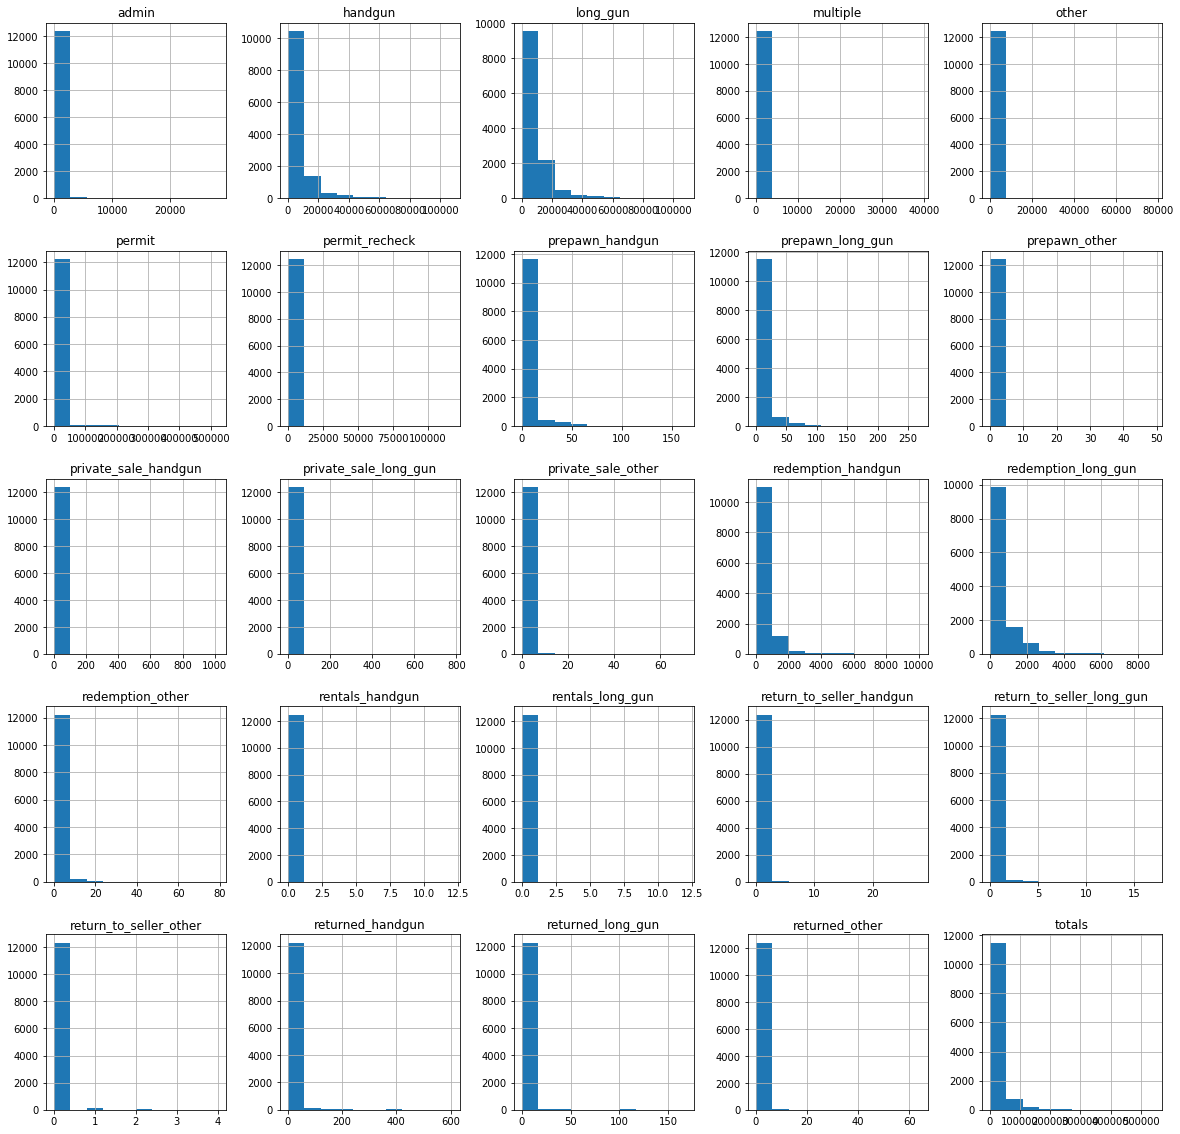

In [67]:
#画直方图根据第1行到第12845行，state列到totals列的数据
df4.loc[0:12484,'state':'totals'].hist(figsize=(20,20));

从所有枪支类型直方图可以看出，handgun, long_gun分布最广，横坐标分布都超过了40000，纵坐标分布handgun超过了10000，long_gun超过了9000。很明显，这两种枪是最受欢迎的枪支类型。

**接下来，看handgun和long_gun的变化情况**

首先画handgun随时间变化的数量变化折线图

In [68]:
#生成month变量的np.array数组
#生成横坐标信息
dates = np.array(df4['month'])
xs = [datetime.strptime(m, '%Y-%M').date() for m in dates]

In [69]:
#生成handgun变量的np.array数组
handgun_amount=df4['handgun'].values

Text(0,0.5,'handgun amount')

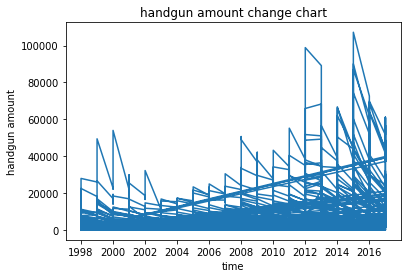

In [70]:
#绘制x轴是时间，y轴是hanggun数量的折线图，标题为handgun amount change chart
plt.plot(xs, handgun_amount)
plt.title('handgun amount change chart')
plt.xlabel('time')
plt.ylabel('handgun amount')

**接下来，画long gun的时间变化数量折线图**

In [71]:
#生成month变量的np.array数组
#生成横坐标信息
dates = np.array(df4['month'])
xs = [datetime.strptime(m, '%Y-%M').date() for m in dates]

In [72]:
#生成long_gun变量的np.array数组
long_gun_amount=df4['long_gun'].values

Text(0,0.5,'long gun amount')

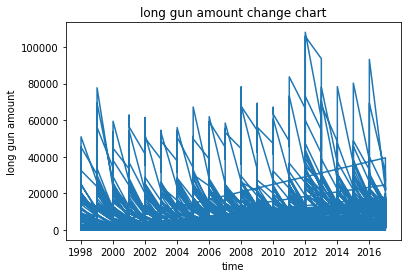

In [73]:
#绘制x轴是时间，y轴是long gun数量的折线图，标题为long gun amount change chart
plt.plot(xs, long_gun_amount)
plt.title('long gun amount change chart')
plt.xlabel('time')
plt.ylabel('long gun amount')

从上面的两幅图可以看出，handgun的变化幅度比long gun的变化幅度更大，从2003-2013年，handgun的购买数量大幅增长，在2015年达到顶峰，在那之后开始回落；而long gun从总体变化上来看，呈波动上升的趋势，在2012年达到最大值，从1998-2017年long gun枪支购买数量经历了增加、减少，再增加、再减少的来回波动变化。

再来回答哪些州购买这些最受欢迎的枪支类型数量总和最多？

In [74]:
#通过groupby函数按照州分类handgun在每个州的数量总和，筛选后的数据命名为handgun_sum
handgun_sum=df4.groupby('state').handgun.sum()
handgun_sum

state
Alabama                 2.222037e+06
Alaska                  4.346020e+05
Arizona                 1.781468e+06
Arkansas                9.655840e+05
California              5.910880e+06
Colorado                2.528422e+06
Connecticut             8.792600e+05
Delaware                2.081090e+05
District of Columbia    4.570000e+03
Florida                 5.909952e+06
Georgia                 2.127777e+06
Guam                    7.642000e+03
Hawaii                  3.000000e+00
Idaho                   4.718360e+05
Illinois                2.434983e+06
Indiana                 2.181274e+06
Iowa                    1.851200e+04
Kansas                  9.313020e+05
Kentucky                1.753246e+06
Louisiana               1.798366e+06
Maine                   4.397530e+05
Mariana Islands         5.371693e+04
Maryland                6.016560e+05
Massachusetts           6.618610e+05
Michigan                9.408590e+05
Minnesota               1.204844e+06
Mississippi             1.186232

In [75]:
#用sort_values函数将handgun_sum按从多到少排序
handgun_sum.sort_values(ascending=False, inplace=True)
handgun_sum

state
Texas                   6.493832e+06
California              5.910880e+06
Florida                 5.909952e+06
Ohio                    3.791457e+06
Tennessee               3.117004e+06
Virginia                2.885493e+06
Colorado                2.528422e+06
Illinois                2.434983e+06
Missouri                2.418598e+06
Alabama                 2.222037e+06
Indiana                 2.181274e+06
Pennsylvania            2.166025e+06
Georgia                 2.127777e+06
Washington              2.025498e+06
Louisiana               1.798366e+06
Arizona                 1.781468e+06
Oklahoma                1.762896e+06
Kentucky                1.753246e+06
Oregon                  1.646143e+06
Wisconsin               1.597173e+06
South Carolina          1.363203e+06
Minnesota               1.204844e+06
Mississippi             1.186232e+06
West Virginia           1.000020e+06
New York                9.884870e+05
Arkansas                9.655840e+05
Michigan                9.408590

通过分析结果可知，handgun 数量总和最多的州分别是Texas, California, Florida, Ohio, Tennessee, Virginia, Colorado,这些州的人更喜欢handgun

In [76]:
##通过groupby函数按照州分类long gun在每个州的数量总和，筛选后的数据命名为long_gun_sum
long_gun_sum=df4.groupby('state').permit.sum()
long_gun_sum

state
Alabama                 1.047441e+06
Alaska                  1.335200e+04
Arizona                 7.105090e+05
Arkansas                5.079510e+05
California              6.530543e+06
Colorado                4.269700e+05
Connecticut             1.595270e+06
Delaware                2.272000e+04
District of Columbia    3.300000e+02
Florida                 1.088802e+06
Georgia                 1.786708e+06
Guam                    0.000000e+00
Hawaii                  1.973210e+05
Idaho                   3.692200e+05
Illinois                9.498639e+06
Indiana                 2.965760e+06
Iowa                    1.467974e+06
Kansas                  1.554710e+05
Kentucky                2.492678e+07
Louisiana               9.078963e+04
Maine                   1.726000e+04
Mariana Islands         5.772266e+04
Maryland                3.458390e+05
Massachusetts           1.365225e+06
Michigan                3.313076e+06
Minnesota               2.453637e+06
Mississippi             9.994500

In [77]:
#用sort_values函数将long_gun_sum按从多到少排序
long_gun_sum.sort_values(ascending=False, inplace=True)
long_gun_sum

state
Kentucky                2.492678e+07
Illinois                9.498639e+06
California              6.530543e+06
North Carolina          3.872974e+06
Michigan                3.313076e+06
Indiana                 2.965760e+06
Texas                   2.857582e+06
Utah                    2.753458e+06
Minnesota               2.453637e+06
Georgia                 1.786708e+06
Washington              1.668159e+06
Connecticut             1.595270e+06
Pennsylvania            1.496008e+06
Iowa                    1.467974e+06
Massachusetts           1.365225e+06
Tennessee               1.130468e+06
Florida                 1.088802e+06
Alabama                 1.047441e+06
South Carolina          9.353190e+05
New York                8.044740e+05
Wisconsin               7.680910e+05
Arizona                 7.105090e+05
Nebraska                5.571920e+05
Arkansas                5.079510e+05
Missouri                4.592410e+05
Colorado                4.269700e+05
New Hampshire           4.093280

通过上面分析结果可以看出，long gun 数量总和最多的州是Kentucky, Illinois, California, North Carolina, Michigan, Indiana, Texas，这些州的人更喜欢long gun

**现在来看第三个问题：近两年哪些州的枪支注册增长率最高？**

**首先，因为gun_data数据最后日期到2017年9月，分别选择2016年9月-2017年9月最近的一年，和2015年9月-2016年9月这一年为最近一年增长率比较的时间范围；permit在这里代表枪支注册，所以选择permit这个变量来看各州的枪支注册增长率的情况。**

In [78]:
#首先，选择2016年9月-2017年9月最近的一年时间范围，将筛选后的数据命名为df_increase_1
df_increase_1=df4.query("month>='2016-09' & month<='2017-09'")
df_increase_1

state    month    permit  permit_recheck  handgun  \
0                   Alabama  2017-09   16717.0             0.0   5734.0   
1                   Alabama  2017-08   19733.0             4.0   6289.0   
2                   Alabama  2017-07   18042.0             1.0   6046.0   
3                   Alabama  2017-06   19508.0            89.0   8275.0   
4                   Alabama  2017-05   18538.0           313.0   7198.0   
5                   Alabama  2017-04   17958.0           340.0   7131.0   
6                   Alabama  2017-03   27666.0             0.0  10603.0   
7                   Alabama  2017-02   23900.0             2.0  10739.0   
8                   Alabama  2017-01   25093.0             0.0   6770.0   
9                   Alabama  2016-12   26996.0             0.0  13733.0   
10                  Alabama  2016-11   22628.0             0.0  10214.0   
11                  Alabama  2016-10   22979.0             0.0   7757.0   
12                  Alabama  2016-09   22014.0             0.0   7125.0   
227                  Alaska  2017-09     209.0             2.0   2320.0   
228                  Alaska  2017-08     247.0            13.0   2656.0   
229                  Alaska  2017-07     222.0             5.0   2911.0   
230                  Alaska  2017-06     242.0             2.0   2909.0   
231                  Alaska  2017-05     247.0             0.0   2851.0   
232                  Alaska  2017-04     289.0             0.0   2997.0   
233                  Alaska  2017-03     362.0             0.0   3067.0   
234                  Alaska  2017-02     137.0             0.0   2857.0   
235                  Alaska  2017-01     185.0             0.0   2028.0   
236                  Alaska  2016-12     254.0             0.0   4087.0   
237                  Alaska  2016-11     254.0             0.0   3396.0   
238                  Alaska  2016-10     336.0             0.0   3906.0   
239                  Alaska  2016-09     306.0             0.0   2654.0   
454                 Arizona  2017-09    5069.0           382.0  11063.0   
455                 Arizona  2017-08    6733.0           326.0  10864.0   
456                 Arizona  2017-07    5606.0           126.0  10194.0   
457                 Arizona  2017-06    6505.0           157.0  11507.0   
458                 Arizona  2017-05    6628.0           136.0  12002.0   
459                 Arizona  2017-04    7385.0           127.0  13302.0   
460                 Arizona  2017-03    9556.0            92.0  14897.0   
461                 Arizona  2017-02    7938.0           124.0  15642.0   
462                 Arizona  2017-01    8117.0           122.0  12108.0   
463                 Arizona  2016-12    8900.0           121.0  18024.0   
464                 Arizona  2016-11    8398.0           138.0  14850.0   
465                 Arizona  2016-10    8072.0            65.0  12405.0   
466                 Arizona  2016-09    8641.0            86.0  11769.0   
681                Arkansas  2017-09    2935.0           632.0   4347.0   
682                Arkansas  2017-08    3313.0           957.0   4827.0   
683                Arkansas  2017-07    2564.0           571.0   4343.0   
684                Arkansas  2017-06    3033.0           778.0   5634.0   
685                Arkansas  2017-05    4137.0           666.0   5181.0   
686                Arkansas  2017-04    3158.0           777.0   5670.0   
687                Arkansas  2017-03    4775.0           740.0   7907.0   
688                Arkansas  2017-02    3220.0           571.0   7974.0   
689                Arkansas  2017-01    2512.0           867.0   5174.0   
690                Arkansas  2016-12    3294.0           692.0   9192.0   
691                Arkansas  2016-11    2755.0           983.0   7226.0   
692                Arkansas  2016-10    4005.0          1088.0   5607.0   
693                Arkansas  2016-09    3300.0           696.0   4802.0   
908              California  2017-09   57839.0 

In [79]:
#在df_increase_1数据中通过groupby函数按照各州分组permit在每个州的总和
increase_16_17=df_increase_1.groupby('state').permit.sum()
increase_16_17

state
Alabama                  281772.0
Alaska                     3290.0
Arizona                   97548.0
Arkansas                  43001.0
California               769670.0
Colorado                  71773.0
Connecticut               89364.0
Delaware                   7405.0
District of Columbia        161.0
Florida                  276114.0
Georgia                  216931.0
Guam                          0.0
Hawaii                    14187.0
Idaho                     62995.0
Illinois                 208996.0
Indiana                  438526.0
Iowa                     125277.0
Kansas                    30570.0
Kentucky                4516482.0
Louisiana                 38749.0
Maine                      8696.0
Mariana Islands               0.0
Maryland                  37567.0
Massachusetts            107466.0
Michigan                 246106.0
Minnesota                481604.0
Mississippi               24674.0
Missouri                  15362.0
Montana                   19680.0
Nebraska

In [80]:
#筛选时间范围在数据最近一年的前一年(2015年9月到2016年9月)， 将筛选后的数据命名为df_increase_2
df_increase_2=df4.query("month>='2015-09' & month<='2016-09'")
df_increase_2

state    month    permit  permit_recheck   handgun  \
12                  Alabama  2016-09   22014.0        0.000000    7125.0   
13                  Alabama  2016-08   22987.0        0.000000    8243.0   
14                  Alabama  2016-07   27765.0        0.000000   10132.0   
15                  Alabama  2016-06   24802.0        0.000000    9146.0   
16                  Alabama  2016-05   20092.0        0.000000    7903.0   
17                  Alabama  2016-04   20959.0        0.000000    9742.0   
18                  Alabama  2016-03   27829.0        0.000000   14372.0   
19                  Alabama  2016-02   24746.0        0.000000   29311.0   
20                  Alabama  2016-01   27242.0     1165.956364   25445.0   
21                  Alabama  2015-12   31359.0     1165.956364   47605.0   
22                  Alabama  2015-11   18870.0     1165.956364   23022.0   
23                  Alabama  2015-10   21958.0     1165.956364   17810.0   
24                  Alabama  2015-09   20999.0     1165.956364   16038.0   
239                  Alaska  2016-09     306.0        0.000000    2654.0   
240                  Alaska  2016-08     183.0        0.000000    2725.0   
241                  Alaska  2016-07     215.0        0.000000    2898.0   
242                  Alaska  2016-06     290.0        0.000000    2987.0   
243                  Alaska  2016-05     253.0        0.000000    2582.0   
244                  Alaska  2016-04     298.0        0.000000    3036.0   
245                  Alaska  2016-03     256.0        0.000000    3171.0   
246                  Alaska  2016-02     284.0        0.000000    3190.0   
247                  Alaska  2016-01     192.0     1165.956364    2859.0   
248                  Alaska  2015-12     245.0     1165.956364    5265.0   
249                  Alaska  2015-11     209.0     1165.956364    3062.0   
250                  Alaska  2015-10     212.0     1165.956364    4016.0   
251                  Alaska  2015-09     184.0     1165.956364    2294.0   
466                 Arizona  2016-09    8641.0       86.000000   11769.0   
467                 Arizona  2016-08    8752.0      103.000000   12069.0   
468                 Arizona  2016-07    7863.0      308.000000   13693.0   
469                 Arizona  2016-06    6371.0      667.000000   12942.0   
470                 Arizona  2016-05    6941.0     1016.000000   10994.0   
471                 Arizona  2016-04    7230.0      907.000000   13086.0   
472                 Arizona  2016-03    8078.0     1628.000000   14387.0   
473                 Arizona  2016-02    4627.0       70.000000   16820.0   
474                 Arizona  2016-01    3898.0     1165.956364   15745.0   
475                 Arizona  2015-12    2940.0     1165.956364   25562.0   
476                 Arizona  2015-11    2303.0     1165.956364   12382.0   
477                 Arizona  2015-10    4502.0     1165.956364   10928.0   
478                 Arizona  2015-09    4161.0     1165.956364   10378.0   
693                Arkansas  2016-09    3300.0      696.000000    4802.0   
694                Arkansas  2016-08    5990.0      840.000000    5666.0   
695                Arkansas  2016-07    4116.0      677.000000    6323.0   
696                Arkansas  2016-06    5233.0      399.000000    5454.0   
697                Arkansas  2016-05    5452.0      331.000000    4551.0   
698                Arkansas  2016-04    5825.0      408.000000    5334.0   
699                Arkansas  2016-03    7649.0      564.000000    7603.0   
700                Arkansas  2016-02    4167.0      358.000000   10532.0   
701                Arkansas  2016-01    3670.0     1165.956364    7954.0   
702                Arkansas  2015-12    4076.0     1165.956364   13780.0   
703                Arkansas  2015-11    3298.0     1165.956364    6359.0   
704                Arkansas  2015-10    4813.0     1165.956364    5524.0   
705                Arkansas  2015-09    6286.0     1165.956364    5356

In [81]:
#在df_increase_2数据中通过groupby函数按照各州分组permit在每个州的总和
increase_15_16=df_increase_2.groupby('state').permit.sum()
increase_15_16

state
Alabama                  311622.0
Alaska                     3127.0
Arizona                   76307.0
Arkansas                  63875.0
California              1237767.0
Colorado                  83166.0
Connecticut              170585.0
Delaware                   7528.0
District of Columbia        167.0
Florida                  338906.0
Georgia                  253761.0
Guam                          0.0
Hawaii                    18408.0
Idaho                     38354.0
Illinois                1235798.0
Indiana                 1174159.0
Iowa                     168132.0
Kansas                    17814.0
Kentucky                3376196.0
Louisiana                 32529.0
Maine                      6950.0
Mariana Islands               0.0
Maryland                  34283.0
Massachusetts             93657.0
Michigan                 285927.0
Minnesota                336479.0
Mississippi               20478.0
Missouri                 114472.0
Montana                   20721.0
Nebraska

In [82]:
#计算数据最近一年的增长率（最近一年各州的permit总和-最近一年前一年各州的permit总和）/最近一年各州的permit总和
#以百分比为单位
#命名为increase_rate_latest 
increase_rate_latest=(increase_16_17-increase_15_16)/increase_15_16
increase_rate_latest

state
Alabama                 -0.095789
Alaska                   0.052127
Arizona                  0.278362
Arkansas                -0.326795
California              -0.378179
Colorado                -0.136991
Connecticut             -0.476132
Delaware                -0.016339
District of Columbia    -0.035928
Florida                 -0.185279
Georgia                 -0.145137
Guam                          NaN
Hawaii                  -0.229302
Idaho                    0.642462
Illinois                -0.830882
Indiana                 -0.626519
Iowa                    -0.254889
Kansas                   0.716066
Kentucky                 0.337743
Louisiana                0.191214
Maine                    0.251223
Mariana Islands               NaN
Maryland                 0.095791
Massachusetts            0.147442
Michigan                -0.139270
Minnesota                0.431305
Mississippi              0.204903
Missouri                -0.865801
Montana                 -0.050239
Nebraska

其中Nah是两年数据都是0

In [83]:
#用sort_values将increase_rate_latest从多到少排序
increase_rate_latest.sort_values(ascending=False, inplace=True)
increase_rate_latest

state
Oregon                  36.978202
Tennessee                1.236280
Wisconsin                0.724955
Kansas                   0.716066
Idaho                    0.642462
Minnesota                0.431305
Virginia                 0.406806
Kentucky                 0.337743
Arizona                  0.278362
Maine                    0.251223
Mississippi              0.204903
Louisiana                0.191214
South Carolina           0.159141
Massachusetts            0.147442
Maryland                 0.095791
South Dakota             0.081468
Alaska                   0.052127
North Dakota             0.029474
New Mexico               0.005062
Pennsylvania            -0.012776
Delaware                -0.016339
District of Columbia    -0.035928
Utah                    -0.038636
Montana                 -0.050239
North Carolina          -0.072774
Ohio                    -0.079764
Nevada                  -0.085569
Alabama                 -0.095789
Colorado                -0.136991
Michigan

**根据上面的数据结果可以知道，在2016年9月到2017年9月，枪支注册增长率最高的州是Oregon，增长了3600.978%，其次从第2到第10分别是：Tennessee（增长了123.628%),Wisconsin(增长了72.4955%),Kansas（增长了71.6066%), Idaho(增长了64.2462%), Minnesota(增长了43.1305%), Virginia(增长了40.6806%), Kentucky(增长了33.7743%), Arizona(增长了27.8362%)，Maine(增长了25.1223%)。**

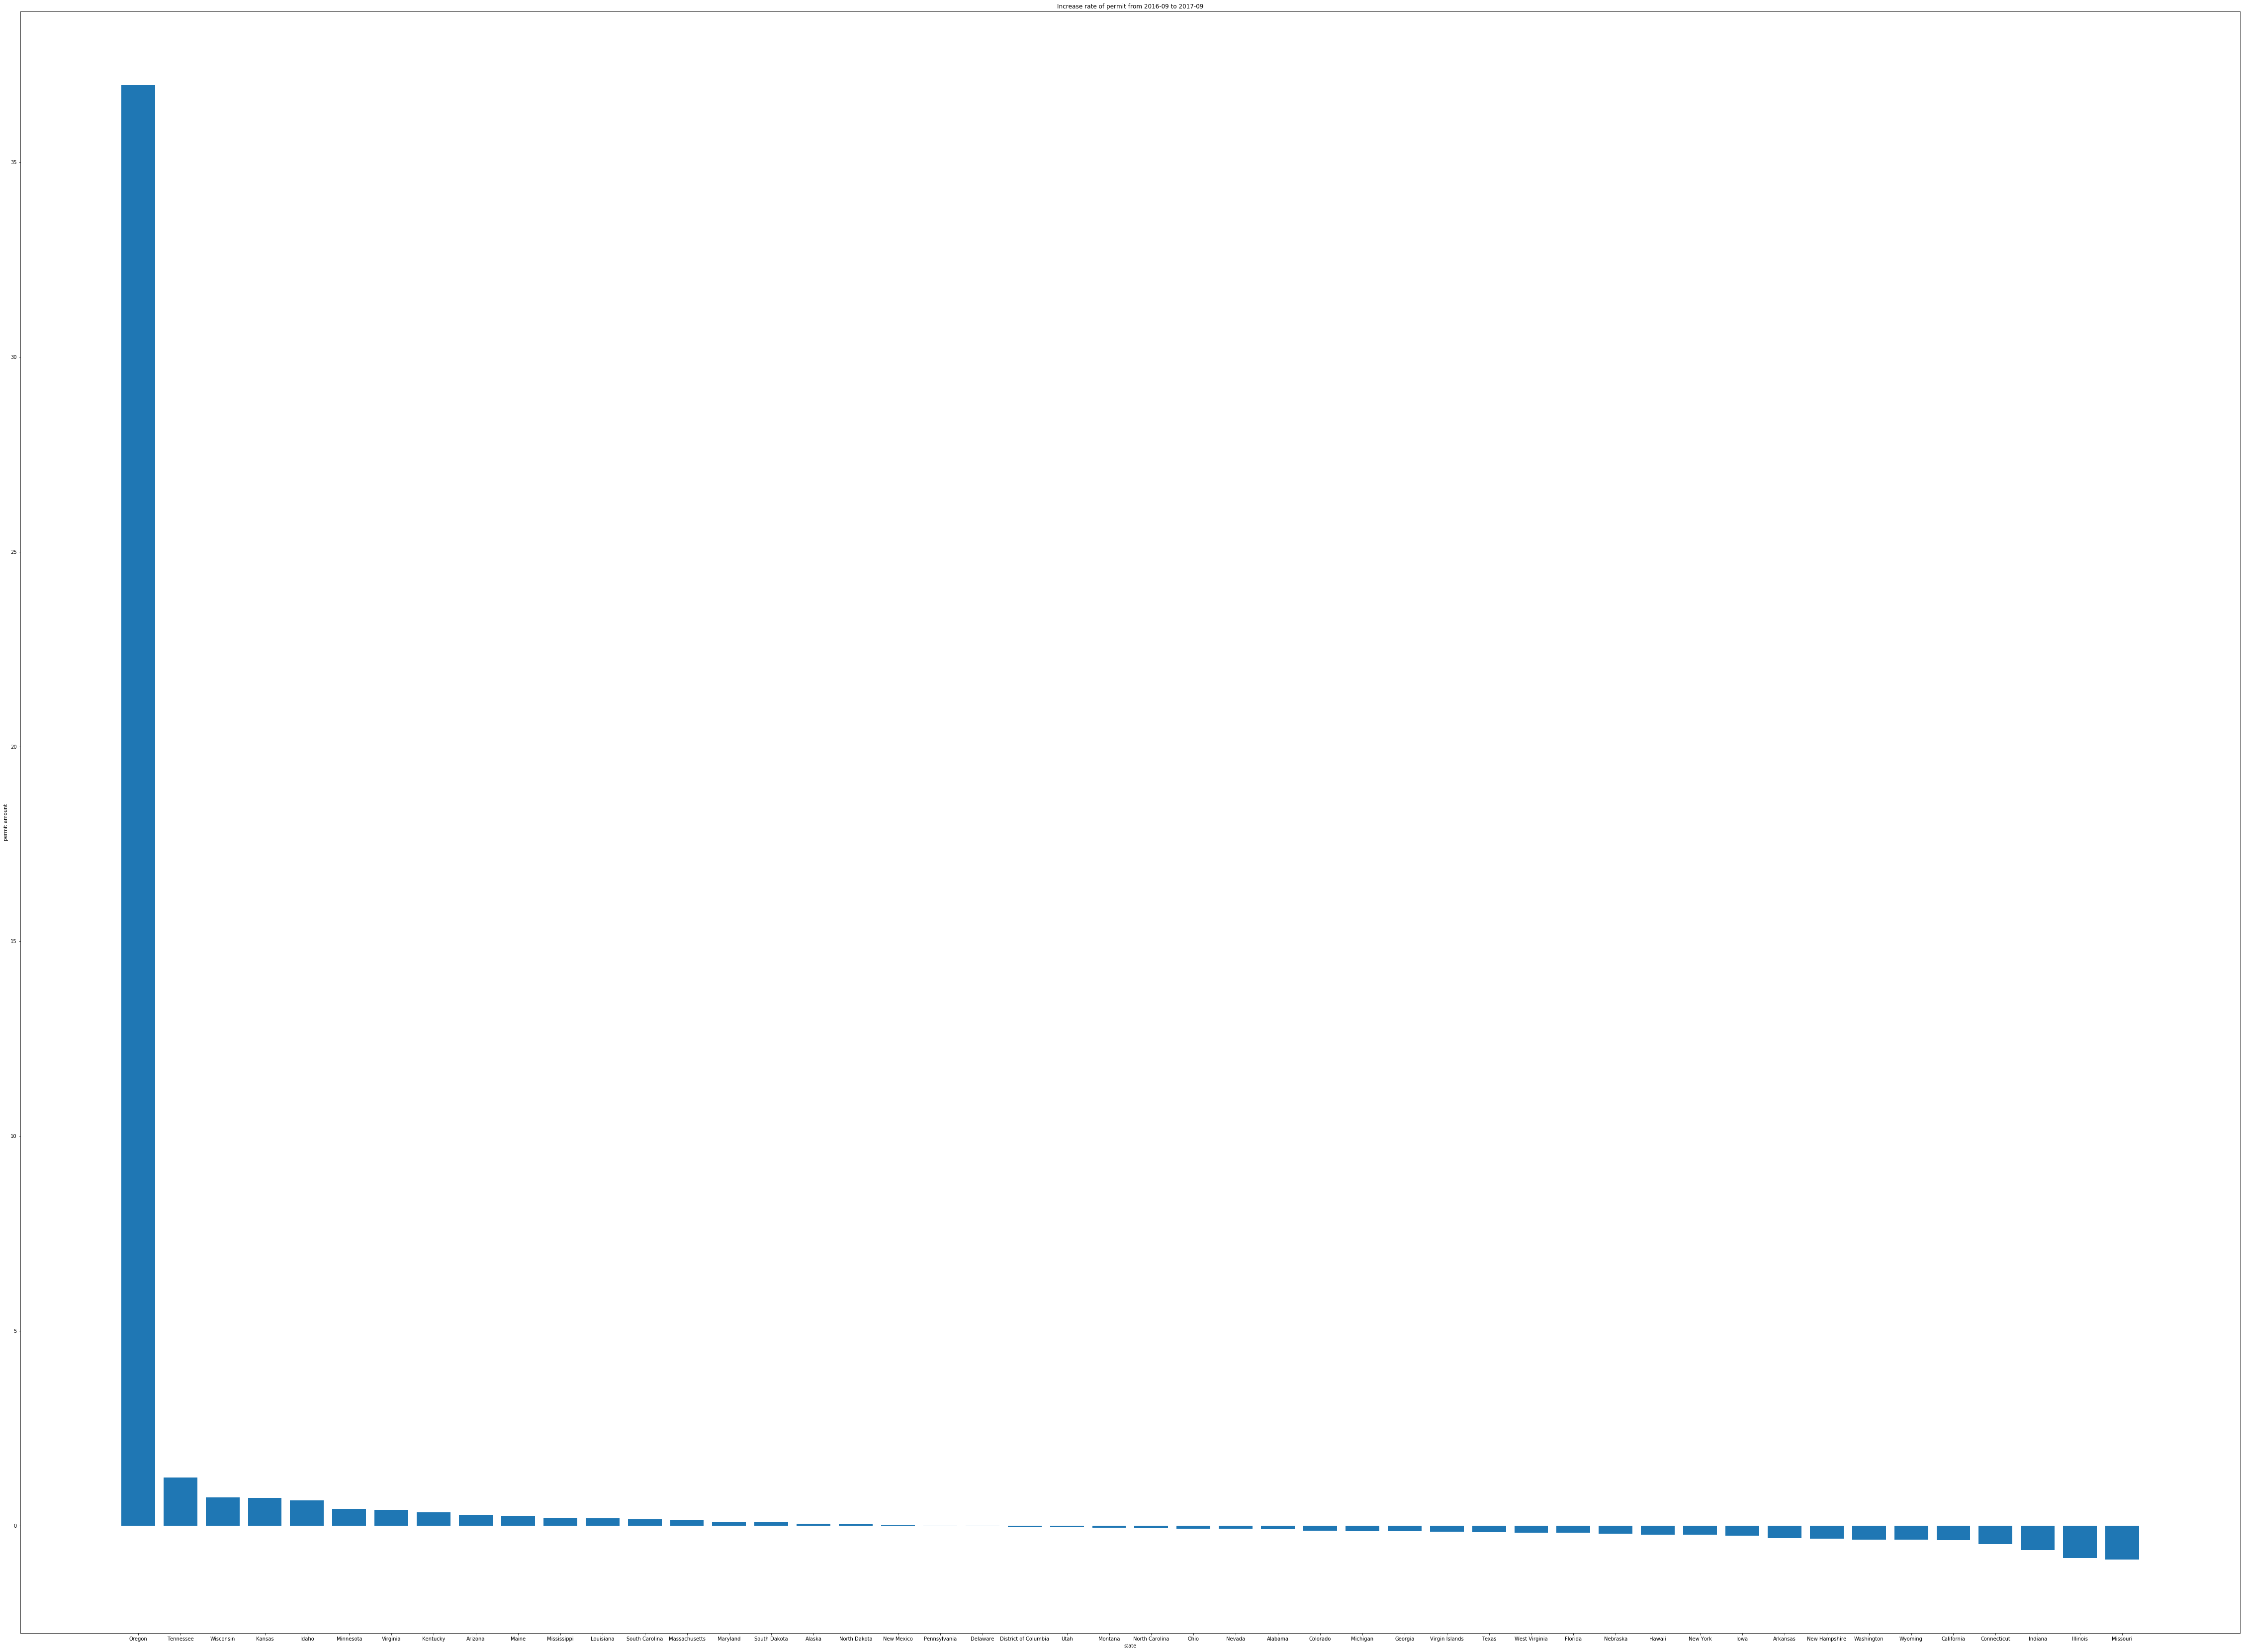

In [84]:
# 画2016-09到2017-09枪支注册增长率图
increase_rate_latest.dropna(inplace=True)
plt.subplots(figsize=(80, 60))
figsize=80, 60
plt.bar(increase_rate_latest.index, increase_rate_latest)
plt.title('Increase rate of permit from 2016-09 to 2017-09')
plt.xlabel('state')
plt.ylabel('permit amount');


**用同样的方法计算2015-09到2016-09的枪支注册增长率**

In [85]:
#筛选时间范围在2014年9月到2015年9月)， 将筛选后的数据命名为df_increase_3
df_increase_3=df4.query("month>='2014-09' & month<='2015-09'")
df_increase_3

state    month    permit  permit_recheck  handgun  \
24                  Alabama  2015-09   20999.0     1165.956364  16038.0   
25                  Alabama  2015-08   25643.0     1165.956364  17991.0   
26                  Alabama  2015-07   22960.0     1165.956364  17698.0   
27                  Alabama  2015-06   16801.0     1165.956364  15299.0   
28                  Alabama  2015-05   15495.0     1165.956364  15629.0   
29                  Alabama  2015-04   17623.0     1165.956364  14929.0   
30                  Alabama  2015-03   21726.0     1165.956364  17870.0   
31                  Alabama  2015-02   16692.0     1165.956364  23552.0   
32                  Alabama  2015-01   16077.0     1165.956364  16291.0   
33                  Alabama  2014-12   16469.0     1165.956364  23630.0   
34                  Alabama  2014-11   11509.0     1165.956364  16301.0   
35                  Alabama  2014-10   15305.0     1165.956364  13930.0   
36                  Alabama  2014-09   14261.0     1165.956364  12337.0   
251                  Alaska  2015-09     184.0     1165.956364   2294.0   
252                  Alaska  2015-08     236.0     1165.956364   2570.0   
253                  Alaska  2015-07     171.0     1165.956364   2709.0   
254                  Alaska  2015-06     291.0     1165.956364   2612.0   
255                  Alaska  2015-05     203.0     1165.956364   2866.0   
256                  Alaska  2015-04     242.0     1165.956364   3107.0   
257                  Alaska  2015-03     255.0     1165.956364   3114.0   
258                  Alaska  2015-02     238.0     1165.956364   3032.0   
259                  Alaska  2015-01     196.0     1165.956364   2439.0   
260                  Alaska  2014-12     212.0     1165.956364   4259.0   
261                  Alaska  2014-11     250.0     1165.956364   3047.0   
262                  Alaska  2014-10     218.0     1165.956364   3997.0   
263                  Alaska  2014-09     217.0     1165.956364   2416.0   
478                 Arizona  2015-09    4161.0     1165.956364  10378.0   
479                 Arizona  2015-08    4687.0     1165.956364   9987.0   
480                 Arizona  2015-07    4262.0     1165.956364  10226.0   
481                 Arizona  2015-06    4728.0     1165.956364   9616.0   
482                 Arizona  2015-05    4719.0     1165.956364  10829.0   
483                 Arizona  2015-04    4046.0     1165.956364  11236.0   
484                 Arizona  2015-03    4107.0     1165.956364  12720.0   
485                 Arizona  2015-02    3728.0     1165.956364  13951.0   
486                 Arizona  2015-01    3690.0     1165.956364  10585.0   
487                 Arizona  2014-12    3892.0     1165.956364  14200.0   
488                 Arizona  2014-11    3705.0     1165.956364   9974.0   
489                 Arizona  2014-10    4094.0     1165.956364   9557.0   
490                 Arizona  2014-09    4108.0     1165.956364   8689.0   
705                Arkansas  2015-09    6286.0     1165.956364   5356.0   
706                Arkansas  2015-08    6794.0     1165.956364   5352.0   
707                Arkansas  2015-07    5128.0     1165.956364   5216.0   
708                Arkansas  2015-06    3873.0     1165.956364   4881.0   
709                Arkansas  2015-05    4750.0     1165.956364   4871.0   
710                Arkansas  2015-04    4927.0     1165.956364   4951.0   
711                Arkansas  2015-03    4650.0     1165.956364   7010.0   
712                Arkansas  2015-02    3025.0     1165.956364   8799.0   
713                Arkansas  2015-01    3896.0     1165.956364   5295.0   
714                Arkansas  2014-12    3675.0     1165.956364   8260.0   
715                Arkansas  2014-11    3982.0     1165.956364   5277.0   
716                Arkansas  2014-10    4214.0     1165.956364   5164.0   
717                Arkansas  2014-09    2787.0     1165.956364   4074.0   
932              California  2015-09   64698.0 

In [86]:
#在df_increase_3数据中通过groupby函数按照各州分组permit在每个州的总和
increase_14_15=df_increase_3.groupby('state').permit.sum()
increase_14_15

state
Alabama                  231560.0
Alaska                     2913.0
Arizona                   53927.0
Arkansas                  57987.0
California               751049.0
Colorado                  52656.0
Connecticut              142570.0
Delaware                   4346.0
District of Columbia          0.0
Florida                  190635.0
Georgia                  181279.0
Guam                          0.0
Hawaii                    15948.0
Idaho                     32778.0
Illinois                 890595.0
Indiana                  531050.0
Iowa                      99802.0
Kansas                    24536.0
Kentucky                2532060.0
Louisiana                 18601.0
Maine                      2745.0
Mariana Islands               0.0
Maryland                  17386.0
Massachusetts             63805.0
Michigan                 212989.0
Minnesota                255213.0
Mississippi               10755.0
Missouri                  86984.0
Montana                   12543.0
Nebraska

In [87]:
#计算2015-09-2016-09的增长率
#以百分比为单位
#命名为increase_rate_latest 
increase_rate_latest2=(increase_15_16-increase_14_15)/increase_14_15
increase_rate_latest2

state
Alabama                 0.345751
Alaska                  0.073464
Arizona                 0.415005
Arkansas                0.101540
California              0.648051
Colorado                0.579421
Connecticut             0.196500
Delaware                0.732168
District of Columbia         inf
Florida                 0.777774
Georgia                 0.399837
Guam                         NaN
Hawaii                  0.154251
Idaho                   0.170114
Illinois                0.387609
Indiana                 1.211014
Iowa                    0.684656
Kansas                 -0.273965
Kentucky                0.333379
Louisiana               0.748777
Maine                   1.531876
Mariana Islands              NaN
Maryland                0.971874
Massachusetts           0.467863
Michigan                0.342450
Minnesota               0.318424
Mississippi             0.904045
Missouri                0.316012
Montana                 0.651997
Nebraska                0.425003
Neva

Nah是两年数据都是0，而inf是14-15年数据是0，15-16年有数据，用15-16年数据减去14-15年数据除以14-15年数据，也就是除以0，除不了，所以结果是inf

In [88]:
#用sort_values函数将increase_rate_latest2按数值从大到小排序
increase_rate_latest2.sort_values(ascending=False, inplace=True)
increase_rate_latest2

state
District of Columbia         inf
South Dakota            1.726063
Ohio                    1.717693
Maine                   1.531876
Wisconsin               1.265698
Indiana                 1.211014
Washington              1.181218
Maryland                0.971874
Mississippi             0.904045
Florida                 0.777774
North Dakota            0.763234
Louisiana               0.748777
Delaware                0.732168
Iowa                    0.684656
South Carolina          0.672772
Montana                 0.651997
California              0.648051
Virginia                0.612164
Colorado                0.579421
Texas                   0.560256
Massachusetts           0.467863
Nebraska                0.425003
Arizona                 0.415005
Georgia                 0.399837
New Mexico              0.395976
Illinois                0.387609
Pennsylvania            0.371784
Alabama                 0.345751
Michigan                0.342450
Kentucky                0.333379
Neva

从分析结果看出，2015-09到2016-09枪支注册增长率最多的州排名前10的分别是South Dakota(增长了172.6063%), 
Ohio(增长了171.7693%), Maine(增长了153.1876%), Wisconsin(增长了126.5698%), Indiana(增长了121.1014%), Washington(增长了118.12%), Maryland(增长了97.1874%), Mississippi(增长了90.4045%), Florida（增长了77.7774%), North Dakota(增长了76.3234%)。

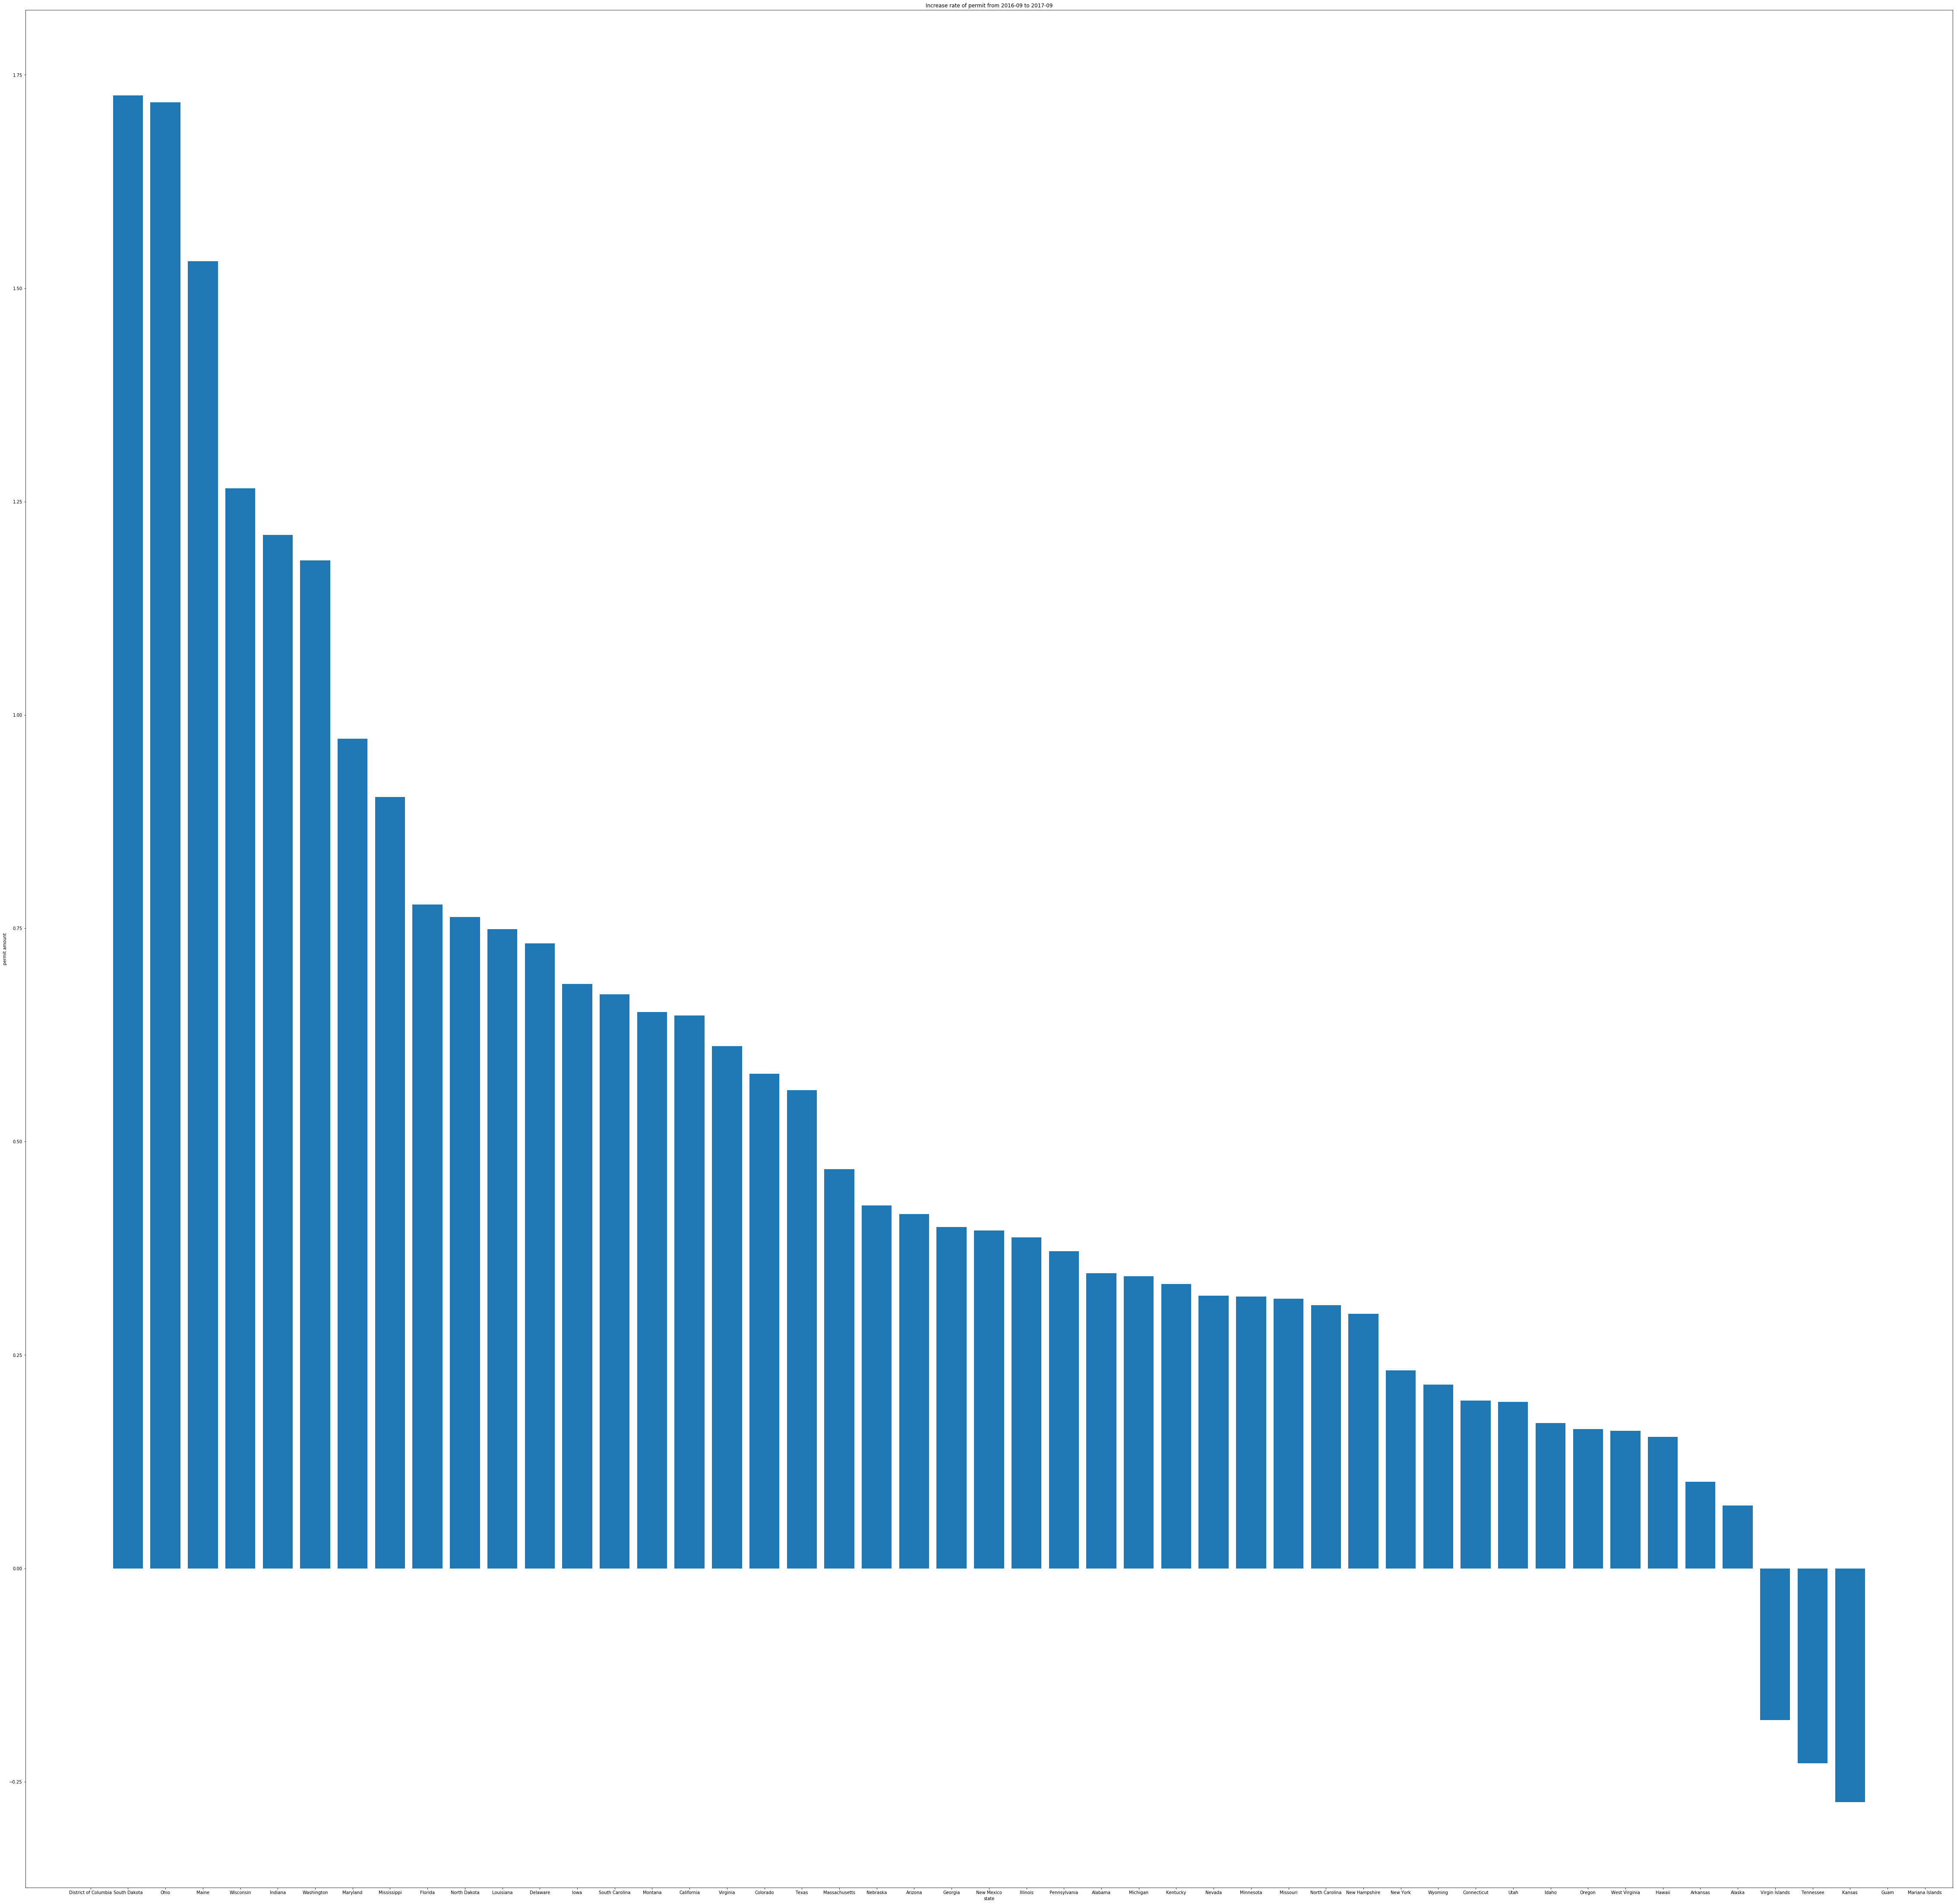

In [89]:
# 画2015-09到2016-09枪支注册增长率图
increase_rate_latest.dropna(inplace=True)
plt.subplots(figsize=(80, 80))
plt.bar(increase_rate_latest2.index, increase_rate_latest2)
plt.title('Increase rate of permit from 2016-09 to 2017-09')
plt.xlabel('state')
plt.ylabel('permit amount');

**现在来回答第四个问题：枪支购买的整体趋势是怎样的？**

通过totals变量和month的折线图，先来看一下totals变量在1998-11到2017-09之间的变化情况

(totals变量是各种枪支类型，枪支注册，枪支注册再核查的总和）

In [90]:
#生成month变量的np.array数组
#生成横坐标信息
dates = np.array(df4['month'])
xs = [datetime.strptime(m, '%Y-%M').date() for m in dates]

In [91]:
#生产totals变量的np.array数组
total=np.array(df4['totals'])

Text(0,0.5,'total')

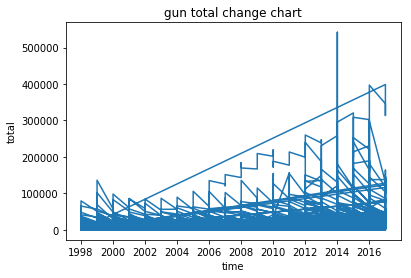

In [92]:
#绘制x轴是时间，y轴是hanggun数量的折线图，标题为handgun amount change chart
plt.plot(xs,total)
plt.title('gun total change chart')
plt.xlabel('time')
plt.ylabel('total')

从这张图可以看出，从1998-2017，枪支的总体情况呈一直上升趋势

再来看看各个州的枪支总体变化情况

In [93]:
#通过groupby函数按照州分类totals在每个州的数量总和，筛选后的数据命名为handgun_sum
total_sum=df4.groupby('state').totals.sum()
total_sum

state
Alabama                  6706079.0
Alaska                   1137643.0
Arizona                  4425714.0
Arkansas                 3752633.0
California              19014063.0
Colorado                 6058482.0
Connecticut              3168126.0
Delaware                  491369.0
District of Columbia        5601.0
Florida                 11695777.0
Georgia                  7209942.0
Guam                       14997.0
Hawaii                    197580.0
Idaho                    1968134.0
Illinois                15471534.0
Indiana                  7737172.0
Iowa                     2297156.0
Kansas                   2624669.0
Kentucky                29762434.0
Louisiana                4705057.0
Maine                    1257457.0
Mariana Islands              462.0
Maryland                 2035652.0
Massachusetts            2571321.0
Michigan                 7254279.0
Minnesota                6279271.0
Mississippi              3576312.0
Missouri                 6549018.0
Montana       

In [94]:
#将total_sum用sort_values按从多到少排序
total_sum.sort_values(ascending=False, inplace=True)
total_sum

state
Kentucky                29762434.0
Texas                   19435186.0
California              19014063.0
Illinois                15471534.0
Pennsylvania            13133876.0
Florida                 11695777.0
Ohio                     8462744.0
North Carolina           7777689.0
Indiana                  7737172.0
Tennessee                7311293.0
Michigan                 7254279.0
Georgia                  7209942.0
Alabama                  6706079.0
Missouri                 6549018.0
Washington               6384517.0
Minnesota                6279271.0
Colorado                 6058482.0
Virginia                 5878675.0
Wisconsin                5131725.0
Louisiana                4705057.0
New York                 4643828.0
Oklahoma                 4584454.0
Arizona                  4425714.0
Utah                     4338273.0
South Carolina           4014432.0
Arkansas                 3752633.0
Oregon                   3751061.0
Mississippi              3576312.0
West Virginia 

从上面totals总量从多到少排序的数据结果可以看出，Kentucky在枪支总体情况方面排名第一（总和29762434.0）， 其次分别是Texas (19435186.0), California (19014063.0), Illinois (15471534.0),Pennsylvania(13133876.0), Florida(11695777.0), Ohio(8462744.0), North Carolina(7777689.0), Indiana (7737172.0), Tennessee(7311293.0),在这些州的枪支总体趋势发展较好；而最后几名Hawaii, Puerto Rico， Virgin Islands, Guam, District of Columbia,Mariana Islands枪支发展趋势较弱。           

总结：在这篇报告中，通过详细分析探讨提出的每一个问题，得到了较为满意的解决方法和答案。人均枪支量和American Indian and Alaska Native alone percent 16（2016年美籍印第安和阿拉斯加本地人百分比）, White alone not Hispanic or Latino percent  2016（2016年白人或西班牙裔或拉丁裔比例）, White alone percent 16（2016年只有白人比例）, Land area in square miles 2010（2010年每平方英里土地面积）, Total retail sales per capita 2012（2012年人均总销售量) 这几个人口普查数据变量高度相关；最受欢迎的枪支类型是handgun和long gun, handgun购买数量经历了大幅上升再回落，long gun波动上升, handgun 数量总和最多的州分别是Texas, California, Florida, Ohio, Tennessee, Virginia, Colorado, long gun 数量总和最多的州是Kentucky, Illinois, California, North Carolina, Michigan, Indiana, Texas;2016-09到2017-09 Oregon, Tennessee, Wisconsin, Kansas， Idaho等州枪支注册增长率最多; 2015-09到2016-09 South Dakota, Ohio, Maine, Wisconsin, Indiana, Washington等州枪支注册增长率最多,从这张图可以看出，从1998-2017，枪支的总体情况呈一直上升趋势， 在这篇报告中，通过详细分析探讨提出的每一个问题，得到了较为满意的解决方法和答案，在Kentucky, Texas, California, Illinois, Pennsylvania, Florida等州的枪支总体趋势发展较好。